# Описание проекта. Телеком

Оператор связи «КупиЗвонок» хочет **снизить отток клиентов** путем предложения промокодов и специальных условий тем, кто планирует прекратить пользоваться услугами связи. Для выявления потенциальных уходящих абонентов «КупиЗвонок» требуется разработать модель, способную **предсказывать решение абонента** о досрочном расторжении договора. Команда оператора собрала личные данные некоторых клиентов, а также информацию о их тарифах и услугах. Ваша задача — обучить модель на этих данных для прогнозирования оттока клиентов. 🤖 

**Описание услуг**  
Оператор предоставляет два основных типа услуг:
- Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
- Интернет. Подключение бывает двух типов: через телефонную линию DSL (англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (англ. fiber optic).

**Также абонентам доступен ряд услуг:**
- Интернет-безопасность: антивирус (Device Protection) и блокировка опасных сайтов (Online Security);
- Выделенная линия технической поддержки (Tech Support);
- Облачное хранилище файлов для резервного копирования данных (Online Backup);
- Стриминговое телевидение (Streaming TV) и каталог фильмов (Streaming Movies).

За услуги клиенты могут платить ежемесячно или раз в 1–2 года. Доступны различные способы расчёта и возможность получить электронный чек.

**Описание данных**  
Данные хранятся в базе данных PostgreSQL. Она состоит из нескольких таблиц:  
- `contract` — информация о договорах;
- `personal` — персональные данные клиентов;
- `internet` — информация об интернет-услугах;
- `phone` — информация об услугах телефонии.

**Таблица `telecom.contract`**
- `customerID` — ID абонента;
- `BeginDate` — дата начала действия договора;
- `EndDate` — дата окончания действия договора;
- `Type` — тип оплаты: раз в год-два или ежемесячно;
- `PaperlessBilling` — электронный расчётный лист;
- `PaymentMethod` — тип платежа;
- `MonthlyCharges` — расходы за месяц;
- `TotalCharges` — общие расходы абонента.

**Таблица `telecom.personal`**
- `customerID` — ID пользователя;
- `gender` — пол;
- `SeniorCitizen` — является ли абонент пенсионером;
- `Partner` — есть ли у абонента супруг или супруга;
- `Dependents` — есть ли у абонента дети.

**Таблица `telecom.internet`**
- `customerID` — ID пользователя;
- `InternetService` — тип подключения;
- `OnlineSecurity` — блокировка опасных сайтов;
- `OnlineBackup` — облачное хранилище файлов для резервного копирования данных;
- `DeviceProtection` — антивирус;
- `TechSupport` — выделенная линия технической поддержки;
- `StreamingTV` — стриминговое телевидение;
- `StreamingMovies` — каталог фильмов.

**Таблица `telecom.phone`**
- `customerID` — ID пользователя;
- `MultipleLines` — подключение телефона к нескольким линиям одновременно.

Информация о договорах актуальна на 1 февраля 2020.

## Декомпозиция задачи
Из условия выходит, что задача машинного обучения в данном случае - **бинарная классификация**.  
Заказчик поставил условие: **ROC-AUC** на тестовой выборке в 25% датасета должен составлять не менее **0.85%**.  
Для этого в проекте будут использоваться следующие инструменты (модели, фреймфорки):
- RandomForest Classifier
- Catboost Classifier
- XGBoost
- Neural net (torch)

# Импорты

## Установка доп. библиотек

In [1]:
# pip install psycopg2

    ERROR: Command errored out with exit status 1:
     command: /opt/conda/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-t6amo115/psycopg2_f762739ea52d4e28b522223b080ddbf0/setup.py'"'"'; __file__='"'"'/tmp/pip-install-t6amo115/psycopg2_f762739ea52d4e28b522223b080ddbf0/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-pgj01_1d
         cwd: /tmp/pip-install-t6amo115/psycopg2_f762739ea52d4e28b522223b080ddbf0/
    Complete output (23 lines):
    running egg_info
    creating /tmp/pip-pip-egg-info-pgj01_1d/psycopg2.egg-info
    writing /tmp/pip-pip-egg-info-pgj01_1d/psycopg2.egg-info/PKG-INFO
    writing dependency_links to /tmp/pip-pip-egg-info-pgj01_1d/psycopg2.egg-info/dependency

    ERROR: Command errored out with exit status 1:
     command: /opt/conda/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-t6amo115/psycopg2_2a445845414444708b0904680282f91a/setup.py'"'"'; __file__='"'"'/tmp/pip-install-t6amo115/psycopg2_2a445845414444708b0904680282f91a/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-ljs2g4zs
         cwd: /tmp/pip-install-t6amo115/psycopg2_2a445845414444708b0904680282f91a/
    Complete output (23 lines):
    running egg_info
    creating /tmp/pip-pip-egg-info-ljs2g4zs/psycopg2.egg-info
    writing /tmp/pip-pip-egg-info-ljs2g4zs/psycopg2.egg-info/PKG-INFO
    writing dependency_links to /tmp/pip-pip-egg-info-ljs2g4zs/psycopg2.egg-info/dependency

    ERROR: Command errored out with exit status 1:
     command: /opt/conda/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-t6amo115/psycopg2_5d8cef5144544afa96674280655b8adf/setup.py'"'"'; __file__='"'"'/tmp/pip-install-t6amo115/psycopg2_5d8cef5144544afa96674280655b8adf/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-usnhe4za
         cwd: /tmp/pip-install-t6amo115/psycopg2_5d8cef5144544afa96674280655b8adf/
    Complete output (23 lines):
    running egg_info
    creating /tmp/pip-pip-egg-info-usnhe4za/psycopg2.egg-info
    writing /tmp/pip-pip-egg-info-usnhe4za/psycopg2.egg-info/PKG-INFO
    writing dependency_links to /tmp/pip-pip-egg-info-usnhe4za/psycopg2.egg-info/dependency

    ERROR: Command errored out with exit status 1:
     command: /opt/conda/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-t6amo115/psycopg2_653470ffc14e43b097e96910de081dc5/setup.py'"'"'; __file__='"'"'/tmp/pip-install-t6amo115/psycopg2_653470ffc14e43b097e96910de081dc5/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-3fdl_y4e
         cwd: /tmp/pip-install-t6amo115/psycopg2_653470ffc14e43b097e96910de081dc5/
    Complete output (14 lines):
    running egg_info
    creating /tmp/pip-pip-egg-info-3fdl_y4e/psycopg2.egg-info
    writing /tmp/pip-pip-egg-info-3fdl_y4e/psycopg2.egg-info/PKG-INFO
    writing dependency_links to /tmp/pip-pip-egg-info-3fdl_y4e/psycopg2.egg-info/dependency

    ERROR: Command errored out with exit status 1:
     command: /opt/conda/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-t6amo115/psycopg2_df29e95e138f4a51b2e3286e4c580229/setup.py'"'"'; __file__='"'"'/tmp/pip-install-t6amo115/psycopg2_df29e95e138f4a51b2e3286e4c580229/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-yqofpykl
         cwd: /tmp/pip-install-t6amo115/psycopg2_df29e95e138f4a51b2e3286e4c580229/
    Complete output (14 lines):
    running egg_info
    creating /tmp/pip-pip-egg-info-yqofpykl/psycopg2.egg-info
    writing /tmp/pip-pip-egg-info-yqofpykl/psycopg2.egg-info/PKG-INFO
    writing dependency_links to /tmp/pip-pip-egg-info-yqofpykl/psycopg2.egg-info/dependency

    ERROR: Command errored out with exit status 1:
     command: /opt/conda/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-t6amo115/psycopg2_0e85c5eae97a4cc997a5e6d30f3cdb17/setup.py'"'"'; __file__='"'"'/tmp/pip-install-t6amo115/psycopg2_0e85c5eae97a4cc997a5e6d30f3cdb17/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-9l653cac
         cwd: /tmp/pip-install-t6amo115/psycopg2_0e85c5eae97a4cc997a5e6d30f3cdb17/
    Complete output (14 lines):
    running egg_info
    creating /tmp/pip-pip-egg-info-9l653cac/psycopg2.egg-info
    writing /tmp/pip-pip-egg-info-9l653cac/psycopg2.egg-info/PKG-INFO
    writing dependency_links to /tmp/pip-pip-egg-info-9l653cac/psycopg2.egg-info/dependency

    ERROR: Command errored out with exit status 1:
     command: /opt/conda/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-t6amo115/psycopg2_e106c822f6f74892853ce4420be79730/setup.py'"'"'; __file__='"'"'/tmp/pip-install-t6amo115/psycopg2_e106c822f6f74892853ce4420be79730/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-4fgbm_na
         cwd: /tmp/pip-install-t6amo115/psycopg2_e106c822f6f74892853ce4420be79730/
    Complete output (14 lines):
    running egg_info
    creating /tmp/pip-pip-egg-info-4fgbm_na/psycopg2.egg-info
    writing /tmp/pip-pip-egg-info-4fgbm_na/psycopg2.egg-info/PKG-INFO
    writing dependency_links to /tmp/pip-pip-egg-info-4fgbm_na/psycopg2.egg-info/dependency

    ERROR: Command errored out with exit status 1:
     command: /opt/conda/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-t6amo115/psycopg2_a0107317ae8744a1806140f80d8257ef/setup.py'"'"'; __file__='"'"'/tmp/pip-install-t6amo115/psycopg2_a0107317ae8744a1806140f80d8257ef/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-2ap1a2wn
         cwd: /tmp/pip-install-t6amo115/psycopg2_a0107317ae8744a1806140f80d8257ef/
    Complete output (6 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/tmp/pip-install-t6amo115/psycopg2_a0107317ae8744a1806140f80d8257ef/setup.py", line 247
        except Warning, w:
                      ^
    SyntaxEr

    ERROR: Command errored out with exit status 1:
     command: /opt/conda/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-t6amo115/psycopg2_506620a3392e46c1a580950852409a61/setup.py'"'"'; __file__='"'"'/tmp/pip-install-t6amo115/psycopg2_506620a3392e46c1a580950852409a61/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-lxkvcrl4
         cwd: /tmp/pip-install-t6amo115/psycopg2_506620a3392e46c1a580950852409a61/
    Complete output (6 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/tmp/pip-install-t6amo115/psycopg2_506620a3392e46c1a580950852409a61/setup.py", line 238
        except Warning, w:
                      ^
    SyntaxEr

In [2]:
# pip install ydata-profiling

In [3]:
# pip install optuna

In [4]:
# pip install -U scikit-learn

## Импорты

In [85]:
import psycopg2
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
from datetime import datetime as dt
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import time as t
from seaborn import heatmap
import seaborn as sns
from ydata_profiling import ProfileReport
from phik import phik_matrix

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_recall_curve, average_precision_score, f1_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, cv, Pool
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING) # выкл. вывод логов optuna
import xgboost as xgb

import torch.optim as optim
import torch
from torch import nn
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch.nn import functional as F

# Загрузка данных

In [2]:
db_config = {
    'user': '***' ,# имя пользователя
    'password': '***', # пароль
    'host': '***t',
    'port': 0000, # порт подключения
    'database': '***'# название базы данных
}

In [3]:
def download_sql(query):
    'загрузка sql-запроса из posgresql в DataFrame'
    # Подключение
    connection = psycopg2.connect(**db_config)
    cursor = connection.cursor()
    cursor.execute(query)
    # выгрузка в pandas
    columns = [desc[0] for desc in cursor.description] # Получаем заголовки столбцов
    df = pd.DataFrame(cursor.fetchall(), columns=columns)
    print('Shape:', df.shape)
    cursor.close()
    connection.close()
    return df

In [4]:
# тест соединения
download_sql("select 'connected to postgresql' as row")

Shape: (1, 1)


,row
0,connected to postgresql


In [5]:
contract = download_sql("select * from telecom.contract")

Shape: (7043, 8)


In [6]:
personal = download_sql("select * from telecom.personal")

Shape: (7043, 5)


In [7]:
internet = download_sql("select * from telecom.internet")

Shape: (5518, 8)


In [8]:
phone = download_sql("select * from telecom.phone")

Shape: (6362, 2)


**Вывод**  
- Выполнено подлючение к PostgreSql
- Все 4 таблицы загружены в pandas

# EDA

## Таблица contract

In [9]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   BeginDate         7043 non-null   object
 2   EndDate           1869 non-null   object
 3   Type              7043 non-null   object
 4   PaperlessBilling  7043 non-null   object
 5   PaymentMethod     7043 non-null   object
 6   MonthlyCharges    7043 non-null   object
 7   TotalCharges      7032 non-null   object
dtypes: object(8)
memory usage: 440.3+ KB


In [10]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,4472-LVYGI,2020-02-01,None,Two year,Yes,Bank transfer (automatic),52.55,None
1,3115-CZMZD,2020-02-01,None,Two year,No,Mailed check,20.25,None
2,3668-QPYBK,2018-08-09,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15
3,5709-LVOEQ,2020-02-01,None,Two year,No,Mailed check,80.85,None
4,9237-HQITU,2019-01-26,2019-11-01,Month-to-month,Yes,Electronic check,70.7,151.65


In [11]:
contract.isna().sum()

customerID             0
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
dtype: int64

In [12]:
# исправление типов данных
contract['MonthlyCharges'] = pd.to_numeric(contract['MonthlyCharges'])
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'])
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format='%Y-%m-%d')
contract['EndDate'] = pd.to_datetime(contract['EndDate'], format='%Y-%m-%d')

In [13]:
profile = ProfileReport(contract, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

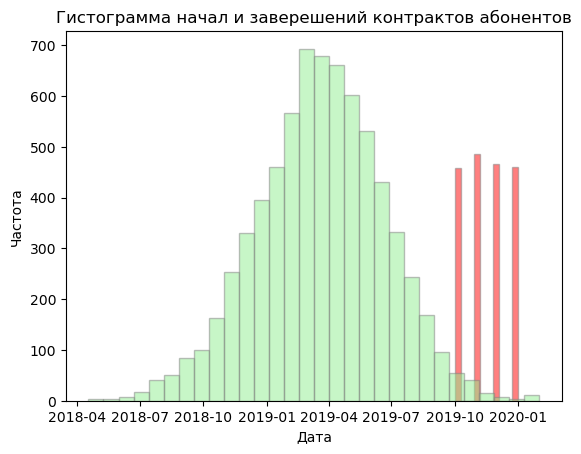

In [14]:
plt.hist(contract.EndDate, bins=10, color='red', alpha=.5, edgecolor='grey')
plt.hist(contract.BeginDate, bins=30, color='lightgreen', alpha=.5, edgecolor='grey')
plt.title('Гистограмма начал и заверешений контрактов абонентов')
plt.xlabel('Дата')
plt.ylabel('Частота')
plt.show()

**Выводы по EDA таблицы contract**:
- `customerID` (ключ таблицы) уникален
- `EndDate` имеет пропуски в размере 73.5%. Скорее всего, это означает, что контракт абонента не закрыт, т.е. клиент активен
- В столбце `TotalCharges` 0.2% пропусков. Проверю.
- Корреляции проверены, подозрительных значений нет. Имеющиеся небольшие корреляции: между `paymentMethod` и `TotalCharges` выглядит случайной, между `TotalCharges` и `MonthlyCharges` - абсолютно логичной, величины взаимосвязаны. Возможно, один из этих признаков стоит исключить при обучении модели.
- Экстремальных значений в таблицах нет. Стоит проверить только, что в `TotalCharges` нет значений меньше, чем в `MonthlyCharges`. Гистограмма значений выглядит нормально. Можно сделать вывод, что 50% клиентов тратят в месяц от 35 до 90 у.е. в месяц, 5% наименьших сосредоточено в диапазоне от 18.2 до 19.7, а 5% больших - от 107.4 до 118.75. Значения смещены "влево". Примерно аналогичная картина с `TotalCharges`.
- В таблице нет дубликатов
- Категориальные текстовые переменные не содержат скрытых дубликатов (когда одно и то же написано немного разным текстом, например, с заглавной буквы и прописной).
- Дата начала контракта имеет нормальное рпспределение со средней примерно в марте 2019. Однако уходили клиенты только в 1-2 числах с октября 2019 по январь 2020. Начало месяца, видимо, обусловлено тем, что в начале месяца в принципе может окончиться контракт. Но почему клиенты не уходили в другие месяцы - это загадка. В любом случае, я не вижу здесь возмодности извлечь какие-то новые полезные признаки.
- Во всем остальном данные в порядке.

Изменения по ходу EDA

In [15]:
def make_bool(series):
    'Превращает значения формата Yes/No в 1/0'
    series = pd.Series(np.where(series == 'Yes', 1, np.where(series == 'No', 0, np.NaN)))
    series = series.astype('int8')
    if series.isna().sum() > 0:
        raise Exception('Были обнаружены сторонние значения, кроме Yes/No')
    else:
        return series

In [16]:
contract['PaperlessBilling'] = make_bool(contract['PaperlessBilling'])

Проверю, есть ли странные MonthlyCharges, превышающие TotalCharges

In [17]:
contract[contract.MonthlyCharges > contract.TotalCharges]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


Есть пустые значения в TotalCharges, проверю

In [18]:
contract[contract.TotalCharges.isna()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,4472-LVYGI,2020-02-01,NaT,Two year,1,Bank transfer (automatic),52.55,NaN
1,3115-CZMZD,2020-02-01,NaT,Two year,0,Mailed check,20.25,NaN
3,5709-LVOEQ,2020-02-01,NaT,Two year,0,Mailed check,80.85,NaN
6,4367-NUYAO,2020-02-01,NaT,Two year,0,Mailed check,25.75,NaN
7,1371-DWPAZ,2020-02-01,NaT,Two year,0,Credit card (automatic),56.05,NaN
9,3213-VVOLG,2020-02-01,NaT,Two year,0,Mailed check,25.35,NaN
10,2923-ARZLG,2020-02-01,NaT,One year,1,Mailed check,19.70,NaN
11,2775-SEFEE,2020-02-01,NaT,Two year,1,Bank transfer (automatic),61.90,NaN
4408,7644-OMVMY,2020-02-01,NaT,Two year,0,Mailed check,19.85,NaN
5160,2520-SGTTA,2020-02-01,NaT,Two year,0,Mailed check,20.00,NaN


Такие клиенты стали абонентами буквально в последний день нашел датасета и еще не успели всё оплатить. Их можно удалить, для обучения бесполезны.

Проверю, у всех ли  клиентов, появившихся в последнюю дату, отсутствует TotalCharges

In [19]:
contract[contract.BeginDate == '2020-02-01']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,4472-LVYGI,2020-02-01,NaT,Two year,1,Bank transfer (automatic),52.55,NaN
1,3115-CZMZD,2020-02-01,NaT,Two year,0,Mailed check,20.25,NaN
3,5709-LVOEQ,2020-02-01,NaT,Two year,0,Mailed check,80.85,NaN
6,4367-NUYAO,2020-02-01,NaT,Two year,0,Mailed check,25.75,NaN
7,1371-DWPAZ,2020-02-01,NaT,Two year,0,Credit card (automatic),56.05,NaN
9,3213-VVOLG,2020-02-01,NaT,Two year,0,Mailed check,25.35,NaN
10,2923-ARZLG,2020-02-01,NaT,One year,1,Mailed check,19.70,NaN
11,2775-SEFEE,2020-02-01,NaT,Two year,1,Bank transfer (automatic),61.90,NaN
4408,7644-OMVMY,2020-02-01,NaT,Two year,0,Mailed check,19.85,NaN
5160,2520-SGTTA,2020-02-01,NaT,Two year,0,Mailed check,20.00,NaN


Да, так и есть. Можно их удалить.

In [20]:
contract = contract[contract.BeginDate != '2020-02-01']

In [21]:
contract.isna().sum()

customerID             0
BeginDate              0
EndDate             5163
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
dtype: int64

In [22]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2,3668-QPYBK,2018-08-09,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15
4,9237-HQITU,2019-01-26,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65
5,9305-CDSKC,2018-12-26,2019-11-01,Month-to-month,1,Electronic check,99.65,820.50
8,7892-POOKP,2019-04-27,2019-11-01,Month-to-month,1,Electronic check,104.80,3046.05
12,0280-XJGEX,2018-11-13,2019-10-01,Month-to-month,1,Bank transfer (automatic),103.70,5036.30


**Прочие выводы по EDA таблицы contract**
- Данные осмотрены, изучены с т.з. пропусков, дублей, подозрительных значений, частотности и пр.
- Убраны клиенты, появившиеся в последний день, т.к. они не несли практической ценности при обучении

## Таблица personal

In [23]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [24]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [25]:
sum(personal.customerID.duplicated())

0

In [26]:
personal.gender.value_counts(normalize=True)

gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

In [27]:
personal.SeniorCitizen.value_counts(normalize=True)

SeniorCitizen
0    0.837853
1    0.162147
Name: proportion, dtype: float64

In [28]:
personal.Partner.value_counts(normalize=True)

Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64

In [29]:
personal.Dependents.value_counts(normalize=True)

Dependents
No     0.700412
Yes    0.299588
Name: proportion, dtype: float64

In [30]:
personal.Partner = make_bool(personal.Partner)

In [31]:
personal.Dependents = make_bool(personal.Dependents)

In [32]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,1,0
1,5575-GNVDE,Male,0,0,0
2,3668-QPYBK,Male,0,0,0
3,7795-CFOCW,Male,0,0,0
4,9237-HQITU,Female,0,0,0


interval columns not set, guessing: ['SeniorCitizen', 'Partner', 'Dependents']


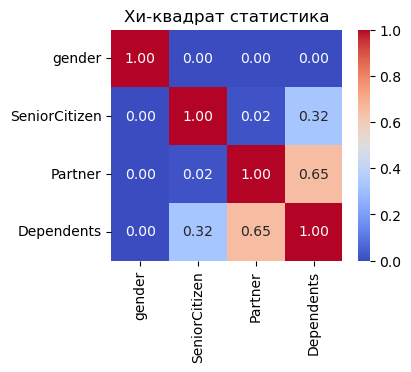

In [33]:
plt.figure(figsize=(4, 3))
heatmap(phik_matrix(personal.iloc[:, 1:]), annot=True, cmap='coolwarm', square=True, cbar=True, fmt=".2f")
plt.title('Хи-квадрат статистика')
plt.show()

**Выводы по EDA таблицы Personal:**
- customerID (ключ таблицы) уникален
- Пропусков и дублей нет
- Категориальные данные вида Yes/No конвертированы в 1/0. В будущем все равно пришлось бы это сделать для обучения моделей.
- Подозрительных значений нет
- Есть сильная взаимосвязь 0.65 между Partner и Dependents, но она не помешает, т.к. линейные модели без регуляризации я обучать в данном проекте не буду, а остальным моделям корреляция не повредит 

## Таблица internet

In [34]:
internet.head()

,c1,c2,c3,c4,c5,c6,c7,c8
0,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1,7590-VHVEG,DSL,No,Yes,No,No,No,No
2,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
4,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No


In [35]:
internet.columns = internet.iloc[0]
internet = internet[1:]

In [36]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 1 to 5517
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [37]:
for col in internet.columns[1:]:
    print(internet[col].value_counts(normalize=True))
    if col != 'InternetService':
        internet[col] = make_bool(internet[col])
    print()

InternetService
Fiber optic    0.561175
DSL            0.438825
Name: proportion, dtype: float64

OnlineSecurity
No     0.63404
Yes    0.36596
Name: proportion, dtype: float64

OnlineBackup
No     0.559724
Yes    0.440276
Name: proportion, dtype: float64

DeviceProtection
No     0.560993
Yes    0.439007
Name: proportion, dtype: float64

TechSupport
No     0.629509
Yes    0.370491
Name: proportion, dtype: float64

StreamingTV
No     0.509335
Yes    0.490665
Name: proportion, dtype: float64

StreamingMovies
No     0.504803
Yes    0.495197
Name: proportion, dtype: float64



In [38]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1,7590-VHVEG,DSL,1.0,0.0,1.0,0.0,0.0,0.0
2,5575-GNVDE,DSL,1.0,1.0,0.0,0.0,0.0,0.0
3,3668-QPYBK,DSL,1.0,0.0,1.0,1.0,0.0,0.0
4,7795-CFOCW,DSL,0.0,0.0,0.0,0.0,0.0,0.0
5,9237-HQITU,Fiber optic,0.0,0.0,1.0,0.0,1.0,1.0


In [39]:
sum(internet.customerID.duplicated())

0

interval columns not set, guessing: ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


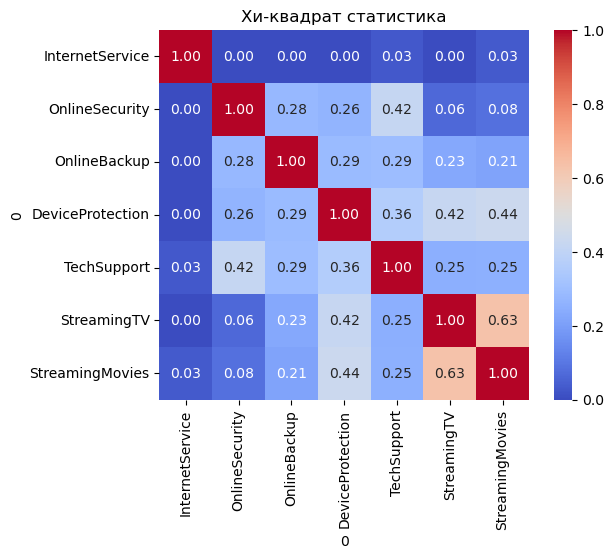

In [40]:
heatmap(phik_matrix(internet.iloc[:, 1:]), annot=True, cmap='coolwarm', square=True, cbar=True, fmt=".2f")
plt.title('Хи-квадрат статистика')
plt.show()

**Выводы по EDA таблицы internet:**  
- Данные проверены, пропусков нет, аномалий нет
- Здесь данных меньше, чем пользователей всего, т.к. не у всех абонентов есть интернет
- Значения вида Yes/No заменены на 1/0
- Сильных взаимосвязей между переменными нет, кроме StreamingTV и StreamingMovies, однако я не вижу причин с этим что-либо делать

## Таблица phone

In [41]:
phone.head()

,c1,c2
0,customerID,MultipleLines
1,5575-GNVDE,No
2,3668-QPYBK,No
3,9237-HQITU,No
4,9305-CDSKC,Yes


In [42]:
phone.columns = phone.iloc[0]
phone = phone[1:]

In [43]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 1 to 6361
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [44]:
sum(phone.customerID.duplicated())

0

In [45]:
phone.MultipleLines.value_counts(normalize=True) 

MultipleLines
No     0.532935
Yes    0.467065
Name: proportion, dtype: float64

In [46]:
phone.MultipleLines = make_bool(phone.MultipleLines)

In [47]:
phone.head()

,customerID,MultipleLines
1,5575-GNVDE,0.0
2,3668-QPYBK,0.0
3,9237-HQITU,1.0
4,9305-CDSKC,1.0
5,1452-KIOVK,1.0


**Выводы по EDA таблицы phone:**  
- Данные проверены, пропусков нет, аномалий нет
- Здесь данных меньше, чем пользователей всего, т.к. не у всех абонентов есть мобильная связь
- Значения вида Yes/No заменены на 1/0

## Merging data

In [94]:
df = (contract.merge(personal, on='customerID')
    .merge(internet, on='customerID', how='left')
    .merge(phone, on='customerID', how='left'))

In [95]:
df.shape

(7032, 20)

Некоторых клиентов не было в таблицах internet и phone, т.е. они не подключали услугу интернета / телефонии. Их можно обозначить соотвующим признаком.

In [96]:
df['phone_availability'] = 1
df.loc[df.MultipleLines.isna(), 'phone_availability'] = 0
df['internet_availability'] = 1
df.loc[df.InternetService.isna(), 'internet_availability'] = 0

In [97]:
# для удобства будущих манипуляций с данными
df = df.set_index('customerID')

**Создаю target.** Если клиент ушел, это 1, если нет, то 0.

In [98]:
df['target'] = np.where(df.EndDate.notna(), 1, 0)

Проверка баланса классов

In [99]:
df['target'].value_counts(normalize=True)

target
0    0.734215
1    0.265785
Name: proportion, dtype: float64

Имеем дело с несбалансированной классификацией, при обучении моделей учту.

In [100]:
df.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,phone_availability,internet_availability,target
customerID,,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,2018-08-09,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,Male,0,0,0,DSL,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1,1
9237-HQITU,2019-01-26,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65,Female,0,0,0,Fiber optic,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1,1,1
9305-CDSKC,2018-12-26,2019-11-01,Month-to-month,1,Electronic check,99.65,820.50,Female,0,0,0,Fiber optic,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1,1,1
7892-POOKP,2019-04-27,2019-11-01,Month-to-month,1,Electronic check,104.80,3046.05,Female,0,1,0,Fiber optic,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1
0280-XJGEX,2018-11-13,2019-10-01,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,Male,0,0,0,Fiber optic,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1,1,1


## Fill NA

Пропуски образовались в результате объединения данных. Можно заполнить нулем, т.к. клиент не подключал данную услугу, что логично.

In [101]:
for col in df.columns:
    if col != 'EndDate':
        df[col] = df[col].fillna(0)

In [102]:
df['InternetService'] = df['InternetService'].astype('str')

In [103]:
df.isna().sum()

BeginDate                   0
EndDate                  5163
Type                        0
PaperlessBilling            0
PaymentMethod               0
MonthlyCharges              0
TotalCharges                0
gender                      0
SeniorCitizen               0
Partner                     0
Dependents                  0
InternetService             0
OnlineSecurity              0
OnlineBackup                0
DeviceProtection            0
TechSupport                 0
StreamingTV                 0
StreamingMovies             0
MultipleLines               0
phone_availability          0
internet_availability       0
target                      0
dtype: int64

Пропуски остались только в EndDate, т.к. данную колонку заполнять бессмысленно.

## Metrics visualization

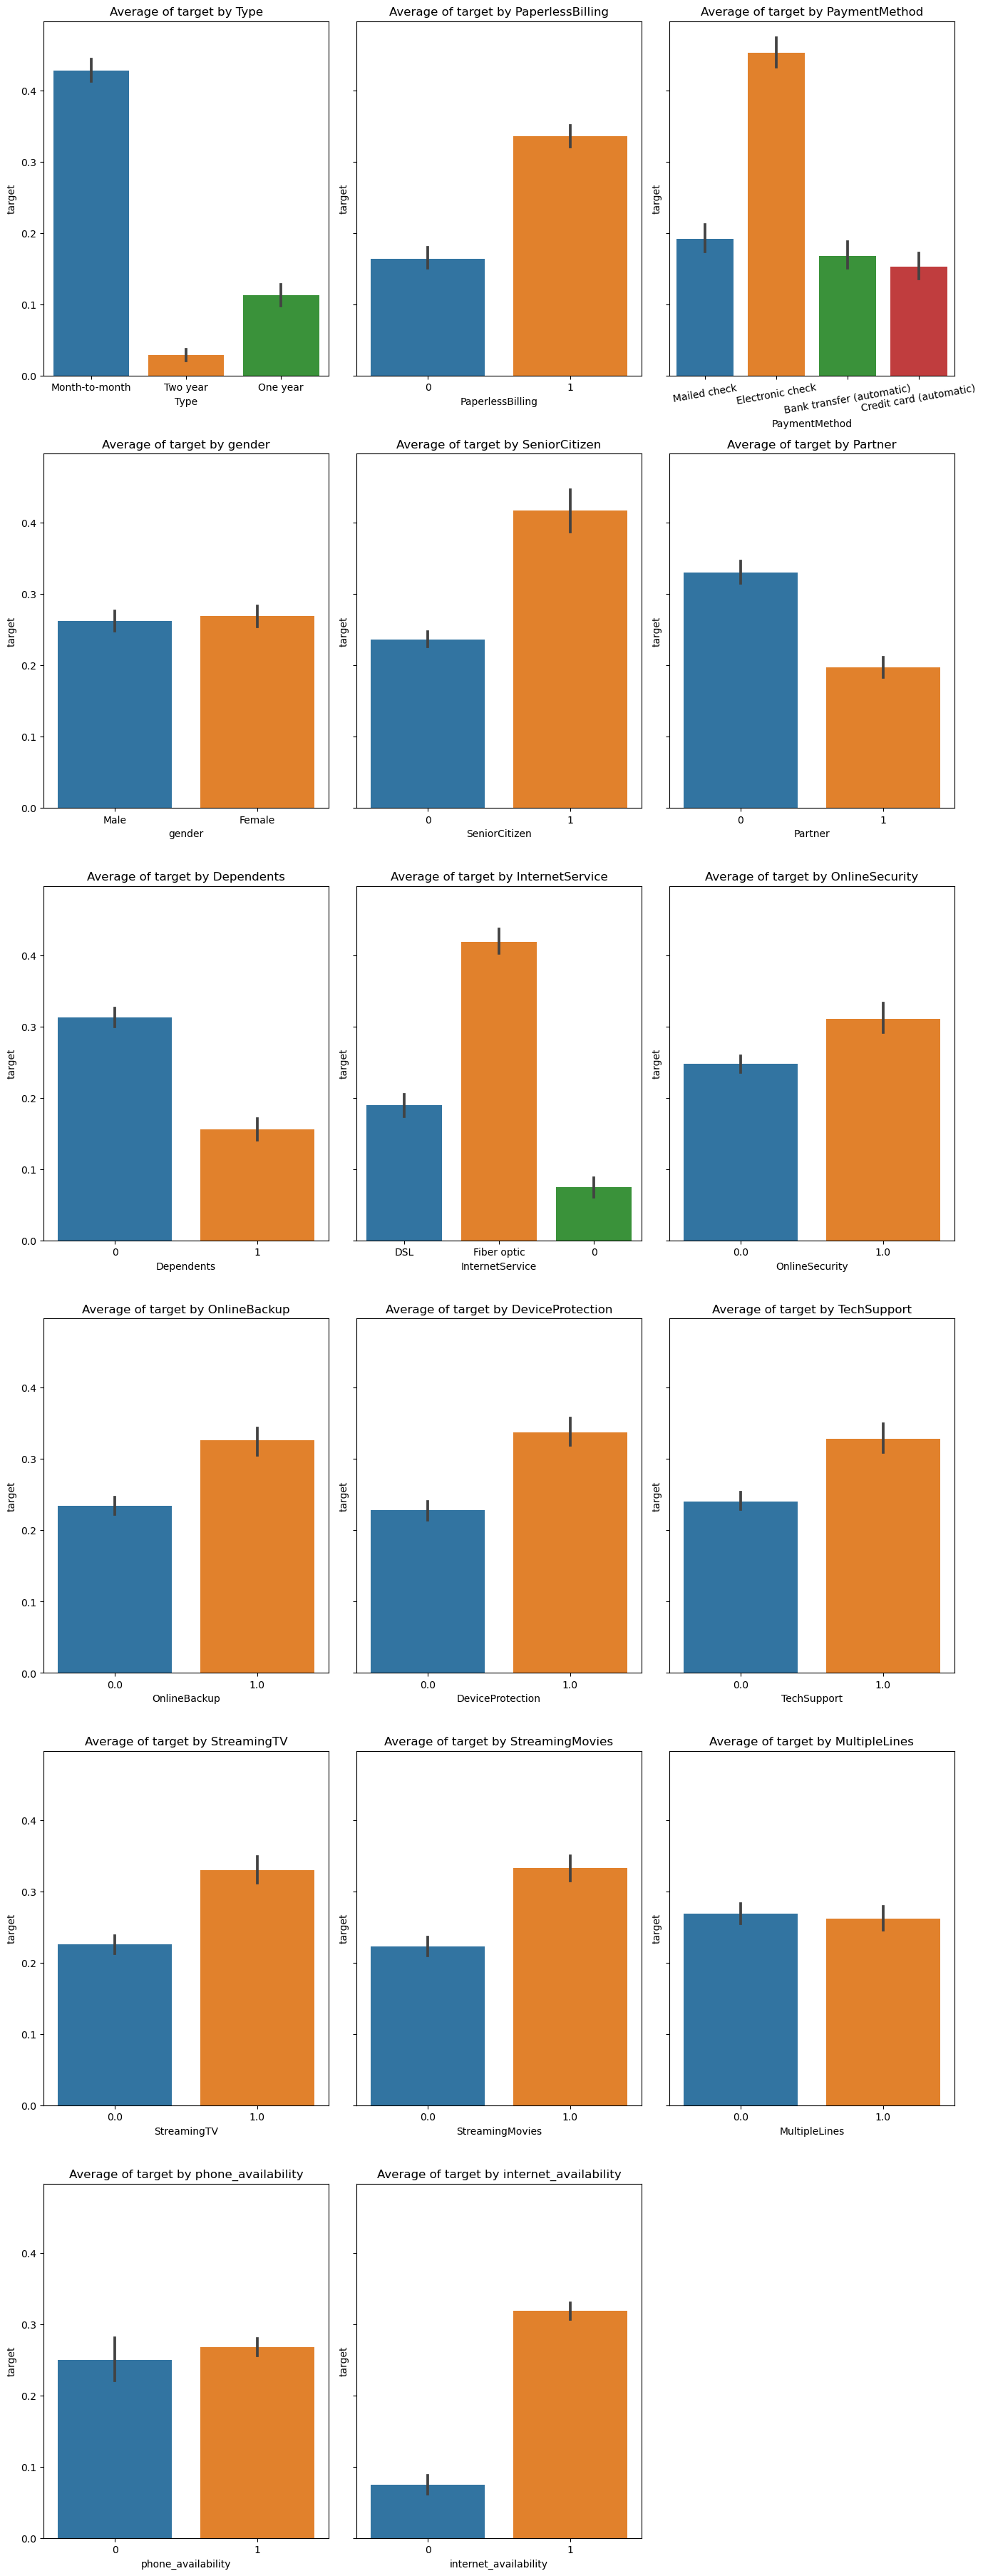

In [104]:
feature_columns = df.columns.tolist()
feature_columns.remove('MonthlyCharges')
feature_columns.remove('TotalCharges')
feature_columns.remove('BeginDate')
feature_columns.remove('EndDate')
feature_columns.remove('target')

# количество строк и столбцов для размещения графиков
num_rows = len(feature_columns)//2 + len(feature_columns) % 2
num_cols = 3
# построение графика по subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 6*num_rows), sharey=True)
for idx, feature_column in enumerate(feature_columns):
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    sns.barplot(x=feature_column, y='target', data=df, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Average of target by {feature_column}')
    axes[row_idx, col_idx].set_xlabel(feature_column)

    # Добавляем разворот подписей осей на 10 градусов, если количество подписей больше трех
    if len(df[feature_column].unique()) > 3:
        axes[row_idx, col_idx].tick_params(axis='x', labelrotation=10)

# Удаляем пустые subplot'ы, если количество графиков не кратно 3
for idx in range(len(feature_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()

interval columns not set, guessing: ['PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'phone_availability', 'internet_availability', 'target']


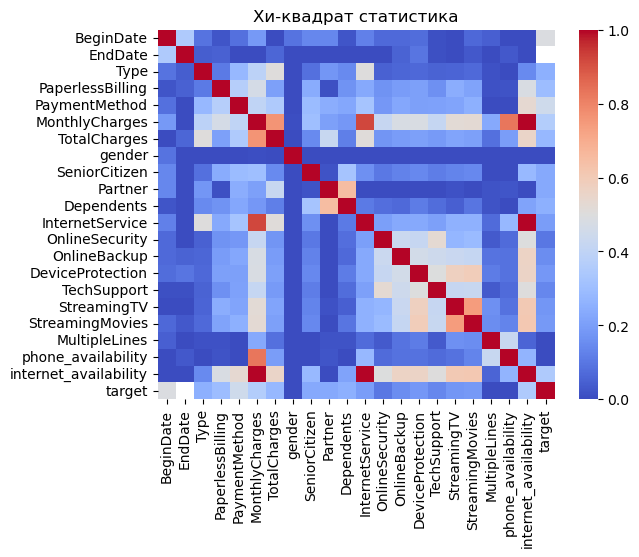

In [105]:
sns.heatmap(phik_matrix(df), cmap='coolwarm')
plt.title('Хи-квадрат статистика')
plt.show()

**Выводы:**  
На target сильнее всего влияют:
- Тип оплаты (клиенты реже уходили, если платили на год-два вперед)
- Клиенты с бумажными чеками реже уходят
- Клиенты с типом платежа вида "Электронный чек" уходили значительно чаще остальных типов
- Пожилые клиенты реже разрывают контракт, чем остальные
- Не состящие в браке клиенты и бездетные реже уходили
- Клиенты с оптическим подключением чаще разрывали контракт
- Клиенты с подлкюченным интернетом и сопутствующими ему услугами уходили чаще других

По матрице корреляции:
- Значительных корреляций (меньше -0.2) на таргет нет, больше 0 тоже отсутствуют
- Некоторые признаки коррелируют между собой сильнее, например, Internet_availability и MonthlyCharges + TotalCharges. Их я рассмотрю подробнее. Остальные признаки коррелируют слабо.

## Feature creation

Создам полезный признак: сколько дней контракту клиента с компанией.

In [106]:
df['active_days'] = (df.EndDate.fillna(pd.to_datetime('2020-02-01')) - df.BeginDate).dt.days

Признаки можно удалить, т.к. из них извлечены все полезные данные.

In [107]:
df = df.drop(columns=['BeginDate', 'EndDate'])

Что вообще влияет на то, уйдет ли клиент? Ну, во-первых, доволен ли клиент услугами. Вопрос комплексный, глобально это:
- Качество услуги
- Конкурентная рыночная цена

Ни то, ни то на имеющихся данных оценить мы не можем.  
Однако можно посмотреть на то, как соотносится размер ежемесячного платежа по клиентам в зависимости от услуг, так как только так можно прикинуть ценовой фактор как степень "довольства" клиента.  
И на основании самых важных факторов добавить в датасет новые признаки.

**Какие услуги влияют на изменение MonthlyCharges?**

Построим матрицу корреляции

interval columns not set, guessing: ['PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'phone_availability', 'internet_availability', 'target', 'active_days']


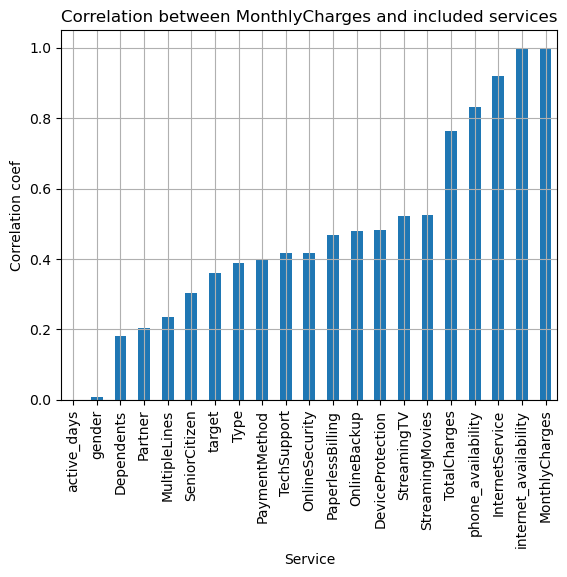

In [108]:
phik_matrix(df)['MonthlyCharges'].sort_values().plot(kind='bar')
plt.grid()
plt.title('Correlation between MonthlyCharges and included services')
plt.xlabel('Service')
plt.ylabel('Correlation coef')
plt.show()

Сильнее всего на MonthlyCharges влияет наличие инернета. Затем идет наличие телефона, но там только один признак - MultipleLines, относящийся к телефону, так что копать глубже нет смысла, модели сами поймут взаимосвязь. Остальные услуги влияют +- одинаково или не влияют, так что рассмотреть стоит именно фактор интернета.

**Число оставшихся предоплаченных месяцев**  
*Понадобится при рассмотрении MonthlyCharges и TotalCharges*  
Логика: если клиент платит на год вперед у него впереди еще несколько оплаченных месяцев, то, по логике, он с низкой вероятностью будет разрывать контракт.  
Для клиентов, оплачивающих ежемесячно, значение составляет 0.

**Как влияет наличие подключенного интернета на месячную оплату?**  
Возможно, стоит ввести отдельный флаг на наличие у пользователя интернета для облегчения понимания, много ли платит клиент.

In [110]:
df.pivot_table(index='InternetService', values='MonthlyCharges', aggfunc=['mean', 'count'])

,mean,count
,MonthlyCharges,MonthlyCharges
InternetService,,
0,21.076283,1520
DSL,58.088017,2416
Fiber optic,91.500129,3096


Действительно, пользователи с интернетом в среднем платят значительно больше. К тому же, тип подключения тоже ощутимо влияет на стоимость, что логично: DSL-соединение значительно медленнее, и, по сути, это сильно устаревшая технология. В нашем датасете, однако, чуть меньше половины пользователей используют данное соединение.

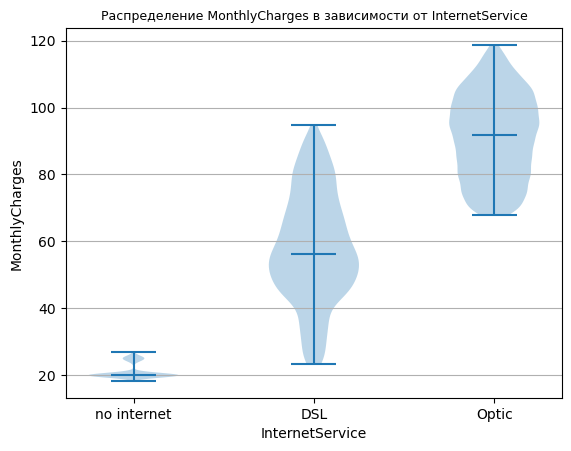

In [111]:
# Создаем три переменные по признаку InternetService
no_int = df.loc[df.InternetService == '0', 'MonthlyCharges']
dsl = df.loc[df.InternetService == 'DSL', 'MonthlyCharges']
opt = df.loc[df.InternetService == 'Fiber optic', 'MonthlyCharges']

# Строим визуализацию
plt.violinplot([no_int, dsl, opt], showmedians=True)
plt.grid(axis='y')
plt.title('Распределение MonthlyCharges в зависимости от InternetService', fontsize=9)
plt.xticks([1, 2, 3], ['no internet', 'DSL', 'Optic'])
plt.xlabel('InternetService')
plt.ylabel('MonthlyCharges')
plt.show()

Поэтому я введу **новый коэффициент `price_segment`**, который будет показывать отношение `MonthlyCharges` пользователей к медианной `MonthlyCharges` для их типа соединения с интернетом или отсутствия интернета.  
Логика такова: допустим, клиент платит за услуги 80 у.е. Много ли это? Не обязательно. Ведь 80 у.е. для клиентов с оптоволоконным соединением (Fiber optic) - это всего лишь примерно 25-ый персентиль по MonthlyCharges. А также это больше, чем 75-ый персентиль у клиентов с DSL-соединением. Клиенты, которые платят 80 у.е. и это много относительно их когорты, более вероятно разорвут контракт, чем те, для которых это мало.

In [112]:
df['price_segment'] = 1
df['price_segment_base'] = 1
df.loc[df.InternetService == '0', 'price_segment_base'] = no_int.describe()['50%']
df.loc[df.InternetService == 'DSL', 'price_segment_base'] = dsl.describe()['50%']
df.loc[df.InternetService == 'Fiber optic', 'price_segment_base'] = opt.describe()['50%']
df['price_segment'] = df['MonthlyCharges'] / df['price_segment_base']
df = df.drop(columns='price_segment_base')
df['price_segment'] = df['price_segment'].round(3)

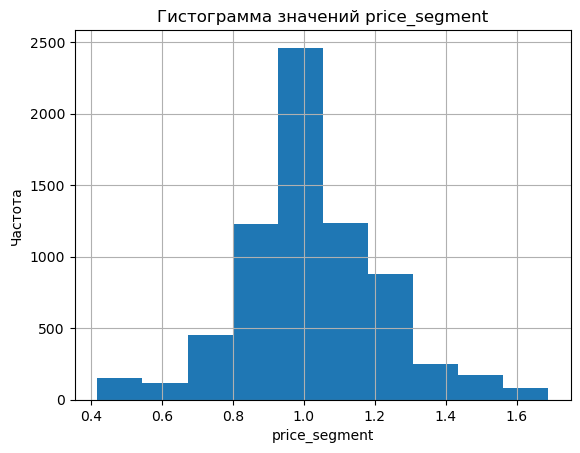

In [113]:
df['price_segment'].hist()
plt.xlabel('price_segment')
plt.ylabel('Частота')
plt.title('Гистограмма значений price_segment')
plt.show()

Таким образом моделям будет гораздо проще понимать, какой клиент платит много. Думаю, что это положительно повлияет на качество итоговых предсказаний.

In [114]:
df.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,phone_availability,internet_availability,target,active_days,price_segment
customerID,,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,Month-to-month,1,Mailed check,53.85,108.15,Male,0,0,0,DSL,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1,1,479,0.959
9237-HQITU,Month-to-month,1,Electronic check,70.70,151.65,Female,0,0,0,Fiber optic,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1,1,1,279,0.771
9305-CDSKC,Month-to-month,1,Electronic check,99.65,820.50,Female,0,0,0,Fiber optic,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1,1,1,310,1.087
7892-POOKP,Month-to-month,1,Electronic check,104.80,3046.05,Female,0,1,0,Fiber optic,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1,188,1.143
0280-XJGEX,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,Male,0,0,0,Fiber optic,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1,1,1,322,1.131


## Split to train & test

In [115]:
SEED = 19224

In [116]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'), df['target'], test_size=0.25,
                                                    shuffle=True, random_state=SEED)
print(X_train.shape)
print(X_test.shape)

(5274, 21)
(1758, 21)


Проверю, нет ли сильных отличий в балансе классов в тесте и трейне

In [117]:
y_train.sum() / y_train.count()

0.26791808873720135

In [118]:
y_test.sum() / y_test.count()

0.2593856655290102

In [119]:
X_train.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,phone_availability,internet_availability,active_days,price_segment
customerID,,,,,,,,,,,,,,,,,,,,,
8387-MOJJT,Month-to-month,1,Credit card (automatic),77.95,3384.0,Female,0,1,1,Fiber optic,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,318,0.850
9971-ZWPBF,Month-to-month,1,Electronic check,108.90,3625.2,Male,1,1,1,Fiber optic,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,415,1.188
1971-DTCZB,Two year,1,Bank transfer (automatic),90.95,6468.6,Female,0,1,0,DSL,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1,1,218,1.620
2040-LDIWQ,Two year,1,Bank transfer (automatic),84.20,5324.5,Male,0,1,1,DSL,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,281,1.500
0306-JAELE,Month-to-month,1,Electronic check,96.10,453.4,Male,0,0,0,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,277,1.048


## Выводы по разделу  
- Данные открыты, осмотрены
- Данные объединены в одну таблицу
- Заполнены пропуски
- Проанализировано влияение каждого признака на целевой признак, построена корреляция
- Сгенерированы новые признаки, призванные помочь в обучении моделей

# Обучение моделей

## RandomForestClassifier

**Baseline**

Скалирование и кодирование здесь происходит внутри pipeline для большей устойчивости модели к новым данным. Спойлер: это действительно обеспечивает лучшее качество на тесте, т.е. оно не так сильно падает по сравнению с валидацией.

In [120]:
# список колонок для скалирования и кодирования
numeric_features = ['MonthlyCharges', 'TotalCharges', 'active_days', 'price_segment']
categorical_features = X_train.select_dtypes(include=['object']).columns

In [121]:
# Создаем ColumnTransformer для определения, какие признаки подвергнуть обработке
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # scaler для числовых признаков
        ('cat', OneHotEncoder(), categorical_features)  # one-hot encoder для категориальных признаков
    ])

rf_model = RandomForestClassifier(random_state=SEED, n_jobs=-1)
# Создаем пайплайн из препроцессора и оценщика
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', rf_model)  # оценщик RandomForestClassifier
])

Проводим кросс-валидацию на 5 фолдах и считаем средний скоринг

In [122]:
cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc').mean()

0.8135104871834592

**Подбор параметров с Optuna**

In [881]:
def objective_rf(trial):
    # параметры для подбора с optuna
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 500),
        "max_depth": trial.suggest_int("max_depth", 2, 40),
        # "min_samples_split": trial.suggest_int("min_samples_split", 2, 30),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 50),
        # "criterion": trial.suggest_categorical("criterion",  ["gini", "entropy", "log_loss"]),
        "max_features": trial.suggest_categorical("max_features",  ["sqrt", "log2", None]),
        "bootstrap": trial.suggest_categorical("bootstrap",  [True, False]),
        "class_weight": 'balanced',
        # "class_weight": trial.suggest_categorical("class_weight", [None, 'balanced', 'balanced_subsample']),
        }
    if params['bootstrap']:
        params['max_samples'] = trial.suggest_float("max_samples", 0.05, 1.0)
        params['oob_score'] = trial.suggest_categorical("oob_score",  [True, False])
    # объявляем модель
    model = RandomForestClassifier(**params, n_jobs=-1, random_state=SEED)

    # Создаем пайплайн из препроцессора и оценщика
    pipeline = Pipeline([
        ('preprocessor', preprocessor), # preprocessor определен ранее
        ('clf', model)  # оценщик RandomForestClassifier
    ])
    # проводим кросс-валидацию на 3 фолдах
    score = cross_val_score(pipeline, X_train, y_train,
                            cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return score

In [882]:
study_rf = optuna.create_study(
    direction="maximize",
    pruner=optuna.pruners.HyperbandPruner(),
    sampler=optuna.samplers.TPESampler(seed=SEED),
    study_name='Random forest'
)
study_rf.optimize(objective_rf, n_trials=100, show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [883]:
print('Best hyperparameters:', study_rf.best_params)
print('Best score:', study_rf.best_value)

Best hyperparameters: {'n_estimators': 435, 'max_depth': 12, 'min_samples_leaf': 30, 'max_features': 'log2', 'bootstrap': True, 'max_samples': 0.9075824045211208, 'oob_score': False}
Best score: 0.8425750594737446


### Анализ подбора гиперпараметров
Данный блок визуализаций позволяет понять, какие параметры важны при обучении, как они влияют на скорость и скоринг. На основе них я подбирал как сами параметры для подбора, так и диапазоны значений.

**От каких параметров сильнее всего зависит время обучения**

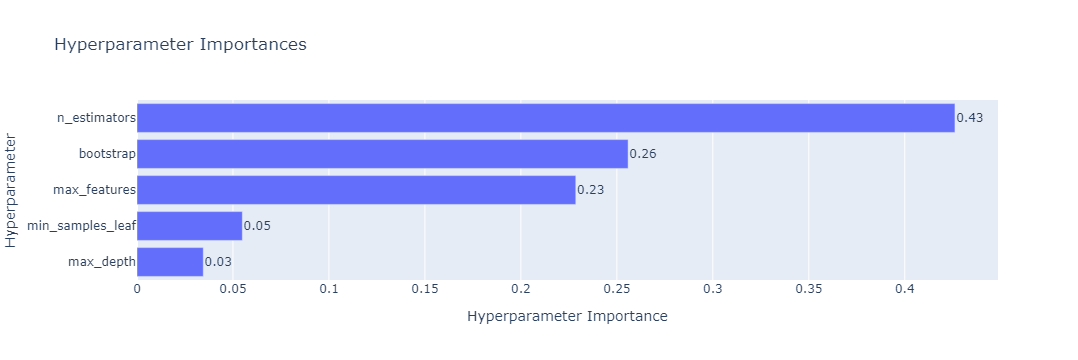

In [890]:
optuna.visualization.plot_param_importances(
    study_rf, target=lambda t: t.duration.total_seconds(), target_name="duration"
)

**Тюнинг каких параметров сильнее всего повлиял на результат**

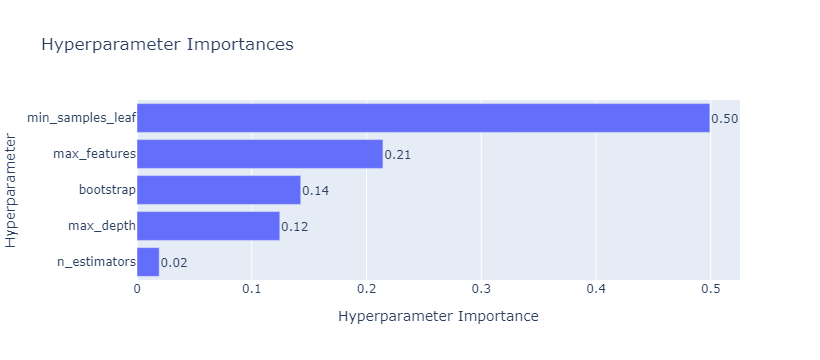

In [891]:
optuna.visualization.plot_param_importances(study_rf)

**Скоринг в зав-ти от значения каждого параметра**  

In [892]:
tuned_params = list(study_rf.best_params.keys())

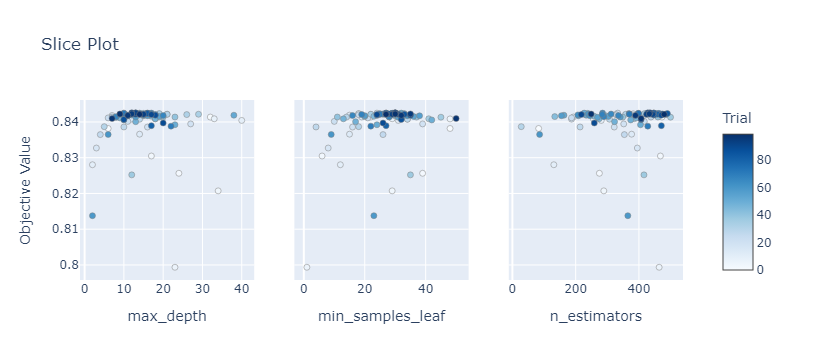

In [893]:
optuna.visualization.plot_slice(study_rf, params=tuned_params[:3])

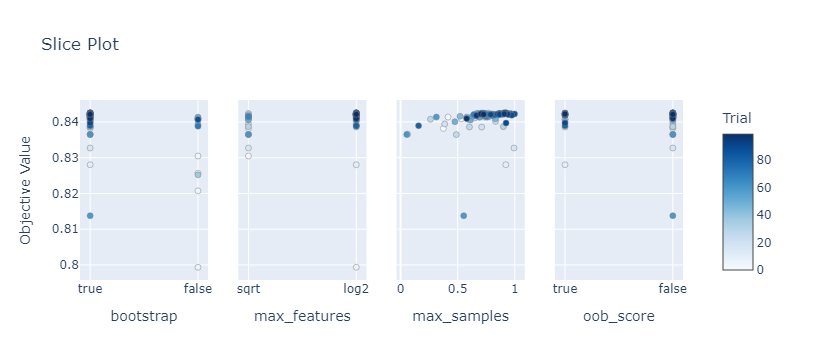

In [894]:
optuna.visualization.plot_slice(study_rf, params=tuned_params[3:])

## Catboost Classifier

**Baseline**

Создаем train_pool специально для Catboost. Кодирование категориальных данных производится силами Catboost. Скалирование для градиентного бустинга в целом не требуется, но, по моим тестам, в данном все же дает минимальный прирост качества на уровне сотых долей единицы.

In [83]:
# Scaling
scaler = StandardScaler()
columns_to_scale = ['MonthlyCharges', 'TotalCharges', 'active_days', 'price_segment']
def scale_columns(df, fit=True):
    data = df.copy()
    # fit_transform or just transform 
    if fit:
        data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
    else:
        data[columns_to_scale] = scaler.transform(data[columns_to_scale])
    return data

X_train_sc = scale_columns(X_train)
X_test_sc = scale_columns(X_test, fit=False)

In [86]:
train_pool = Pool(X_train_sc, y_train, cat_features=list(categorical_features))

In [87]:
params = {"loss_function": 'Logloss',
         "eval_metric": 'AUC',
         "custom_loss": 'AUC'}

scores = cv(train_pool, params, fold_count=5, shuffle=True, seed=SEED, early_stopping_rounds=50,
            plot=True, logging_level='Silent')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [88]:
print('Baseline score:', scores['test-AUC-mean'].values[-1])

Baseline score: 0.8462674045368793


**Подбор параметров с Optuna**

В baseline видно, что модель быстро переобучается. Задача - найти такой скоуп параметров, который позволит пройти как можно больше эпох без переобучения. Возможно, что алгоритм получится консервативным и медленным.

In [89]:
def objective(trial):
    # параметры для подбора с optuna
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        "depth": trial.suggest_int("depth", 3, 8),
        "iterations": trial.suggest_int("iterations", 500, 2000),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 20.),
        "grow_policy": trial.suggest_categorical("grow_policy", ["SymmetricTree", "Depthwise", "Lossguide"]),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 30, 150),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.3, 1),
        "random_strength": trial.suggest_float("random_strength", 1e-2, 3., log=True),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 1e-2, 30),
        # "auto_class_weights": 'Balanced',
        "loss_function": 'Logloss',
        "eval_metric": 'AUC',
        "custom_loss": 'AUC'
    }
    # cross-validation with early_stopping
    scores = cv(train_pool, params, fold_count=5, shuffle=True, seed=SEED, early_stopping_rounds=50,
                plot=False, logging_level='Silent')
    
    return scores['test-AUC-mean'].values[-1]

In [90]:
study_cat = optuna.create_study(
    direction="maximize",
    pruner=optuna.pruners.HyperbandPruner(),
    sampler=optuna.samplers.TPESampler(seed=SEED),
    study_name='Catboost optimize'
)
study_cat.optimize(objective, n_trials=50, show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [1204]:
print('Best hyperparameters:', study_cat.best_params)
print('Best score:', study_cat.best_value)

Best hyperparameters: {'learning_rate': 0.018600679459413242, 'depth': 4, 'iterations': 691, 'l2_leaf_reg': 3.543724173914119, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 99, 'colsample_bylevel': 0.628821866274667, 'random_strength': 0.7866992394017865, 'bagging_temperature': 21.026209721289728}
Best score: 0.8479060512118524


### Анализ подбора гиперпараметров
Данный блок визуализаций позволяет понять, какие параметры важны при обучении, как они влияют на скорость и скоринг. На основе них я подбирал как сами параметры для подбора, так и диапазоны значений.

**От каких параметров сильнее всего зависит время обучения**

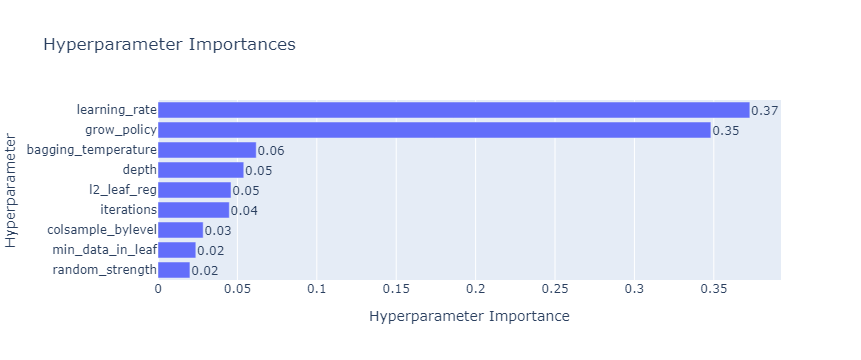

In [1205]:
optuna.visualization.plot_param_importances(
    study_cat, target=lambda t: t.duration.total_seconds(), target_name="duration"
)

**Тюнинг каких параметров сильнее всего повлиял на результат**

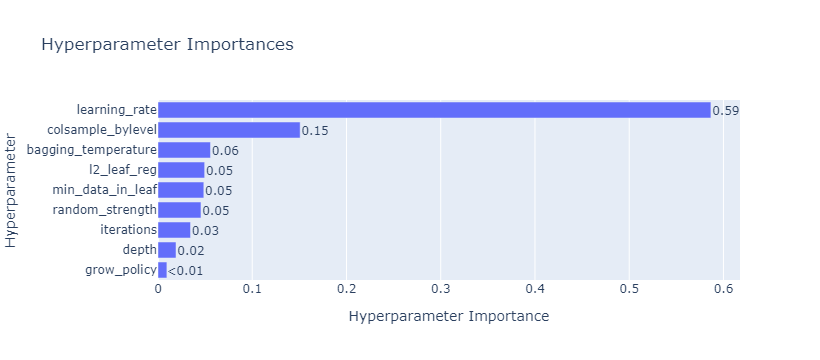

In [1206]:
optuna.visualization.plot_param_importances(study_cat)

**Скоринг в зав-ти от значения каждого параметра**  
по 4 в ряду

In [1207]:
tuned_params = list(study_cat.best_params.keys())

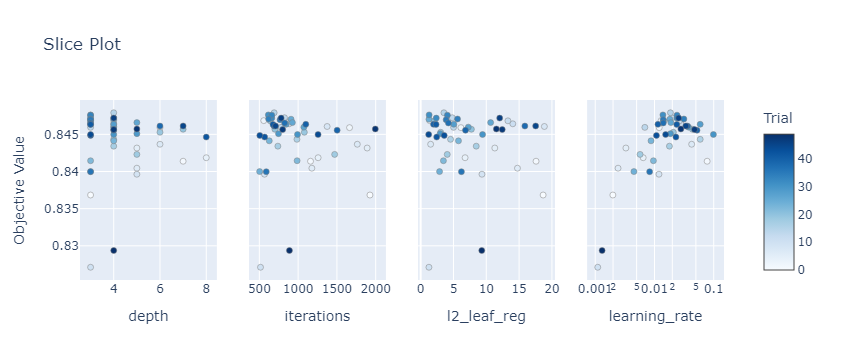

In [1208]:
optuna.visualization.plot_slice(study_cat, params=tuned_params[:4])

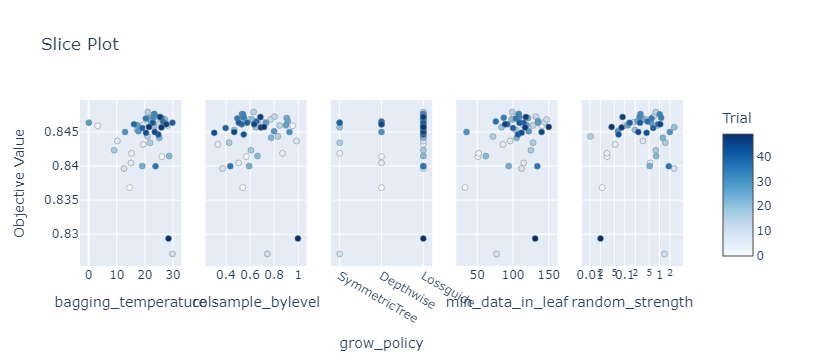

In [1209]:
optuna.visualization.plot_slice(study_cat, params=tuned_params[4:])

## XGBoost

Для использования XGBoost нужно закодировать категориальные признаки

In [1087]:
encoder = OneHotEncoder(sparse_output=False, drop='first')

def one_hot_encode_text_columns(df, fit=True):
    data = df.copy()
    text_columns = data.select_dtypes(include=['object']).columns

    if len(text_columns) == 0:
        print("Нет столбцов с текстовыми значениями")
        return data
    # fit_transform or just transform 
    if fit:
        encoded_columns = encoder.fit_transform(data[text_columns])
    else:
        encoded_columns = encoder.transform(data[text_columns])
        
    encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(), index=data.index)
    data.drop(columns=text_columns, inplace=True)
    data = pd.concat([data, encoded_df], axis=1)
    
    return data

In [1088]:
X_train_enc = one_hot_encode_text_columns(X_train)

In [1089]:
X_test_enc = one_hot_encode_text_columns(X_test, fit=False)

Преобразуем данные в специальный формат для более быстрого обучения XGBoost - DMatrix

In [1010]:
xgb_train = xgb.DMatrix(X_train_enc, y_train)

**Baseline**

In [1015]:
params = {"objective":"binary:logistic",
          'colsample_bytree': 0.8,
          'learning_rate': 1e-1}

xgb_cv = xgb.cv(dtrain=xgb_train, params=params, nfold=5,
                    num_boost_round=500, early_stopping_rounds=20, metrics="auc", as_pandas=True, seed=SEED)

In [1016]:
xgb_cv['test-auc-mean'].values[-1]

0.8422660825508134

**Подбор параметров с Optuna**

In [1026]:
def objective_xgb(trial):
    # параметры для подбора с optuna
    params = {"booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
              "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1, log=True),
              "min_child_weight": trial.suggest_int("min_child_weight", 0., 30.),
              "max_depth": trial.suggest_int("max_depth", 2, 10),
              "subsample": trial.suggest_float("subsample", 0.1, 1.),
              "colsample_bytree": trial.suggest_float("colsample_bytree", 0.1, 1.),
              "lambda": trial.suggest_float("lambda", 1e-4, 10., log=True),
              "objective": "binary:logistic",
              "tree_method": "auto",
              "device": 'cpu',
              "seed": SEED
                }
    num_boost_round = trial.suggest_int("num_boost_round", 100, 1000)
    # объявляем модель
    results = xgb.cv(dtrain=xgb_train, params=params, nfold=5, metrics="auc", as_pandas=True,
                 num_boost_round=num_boost_round, early_stopping_rounds=num_boost_round//10)
    
    return results['test-auc-mean'].values[-1]

In [1027]:
study_xgb = optuna.create_study(
    direction="maximize",
    pruner=optuna.pruners.HyperbandPruner(),
    sampler=optuna.samplers.TPESampler(seed=SEED),
    study_name='XGBoost'
)
study_xgb.optimize(objective_xgb, n_trials=50, show_progress_bar=True, show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [1028]:
print('Best hyperparameters:', study_xgb.best_params)
print('Best score:', study_xgb.best_value)

Best hyperparameters: {'booster': 'gbtree', 'learning_rate': 0.0475035674793992, 'min_child_weight': 15, 'max_depth': 2, 'subsample': 0.7003112659436717, 'colsample_bytree': 0.6809197802729815, 'lambda': 0.007414823796427191, 'num_boost_round': 748}
Best score: 0.8452335890492474


### Анализ подбора гиперпараметров
Данный блок визуализаций позволяет понять, какие параметры важны при обучении, как они влияют на скорость и скоринг. На основе них я подбирал как сами параметры для подбора, так и диапазоны значений.

**От каких параметров сильнее всего зависит время обучения**

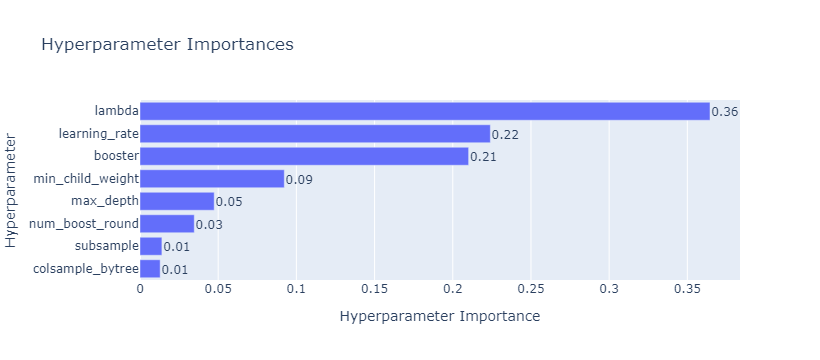

In [1029]:
optuna.visualization.plot_param_importances(
    study_xgb, target=lambda t: t.duration.total_seconds(), target_name="duration"
)

**Тюнинг каких параметров сильнее всего повлиял на результат**

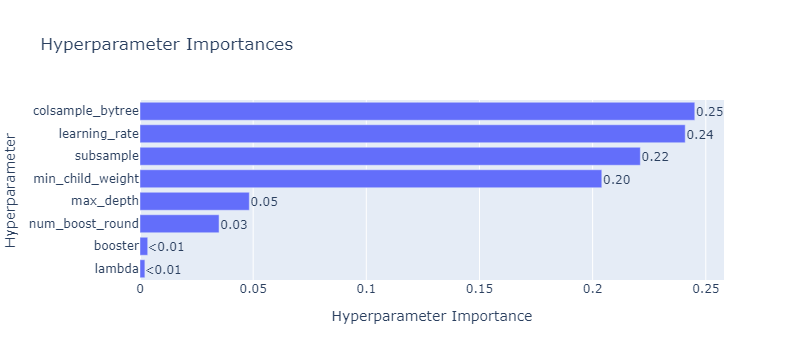

In [1030]:
optuna.visualization.plot_param_importances(study_xgb)

**Скоринг в зав-ти от значения каждого параметра**  

In [1031]:
tuned_params = list(study_xgb.best_params.keys())

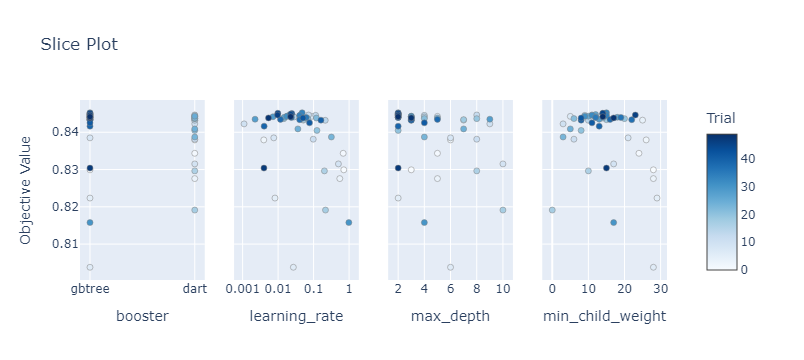

In [1033]:
optuna.visualization.plot_slice(study_xgb, params=tuned_params[:4])

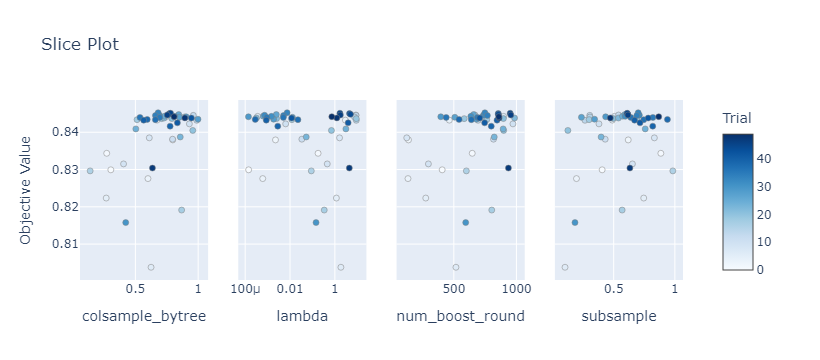

In [1034]:
optuna.visualization.plot_slice(study_xgb, params=tuned_params[4:])

## Нейронная сеть (torch)

In [1053]:
print(f"Is CUDA supported by this system?\
      {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")

# Перенос модели на GPU, если доступен
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('device:', device)

Is CUDA supported by this system?      True
CUDA version: 12.1
device: cuda


In [1054]:
# фиксируем случайное состояние для torch
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Дополнительно зафиксируем seed для NumPy
np.random.seed(SEED)

Отделяю от трейна дополнительную валидационную выборку.  
Берем `X_train_enc`, в котором лежат уже закодированные ранее текстовые переменные. 

In [1210]:
X_train_nn, X_valid_nn, y_train_nn, y_valid_nn = train_test_split(X_train_enc, y_train, test_size=0.25, random_state=SEED)
print(X_train_nn.shape)
print(X_valid_nn.shape)

(3955, 25)
(1319, 25)


Для обучения нейронной сети почти всегда требуется **скалирование данных**

In [1211]:
X_train_nn = scale_columns(X_train_nn)
X_valid_nn = scale_columns(X_valid_nn, fit=False)

In [1060]:
# создадим для трейн и тест TensorDataset для удобства последующей конвертации в DataLoader с подбираемым значением батча
train_ds = TensorDataset(torch.FloatTensor(X_train_nn.values).to(device),
                         torch.FloatTensor(y_train_nn.values).to(device))

X_valid = torch.FloatTensor(X_valid_nn.values).to(device)
y_valid = torch.FloatTensor(y_valid_nn.values).to(device)

In [1061]:
def make_net_structure(layers, pow, dropout=0, norm=None, act='ReLU'):
    '''
    Функция возвращает структуру нейронной сети, получая на вход различные параметры:
    - layers - сколько будет слоев
    - pow - степень, в которую будет число 2, для определения кол-ва нейронов в слое
    - dropout - случайное частичное "выключение" нейронов в слоях с заданной вероятностью
    - norm - нормализация, доступно: none, после активации (after_act), до активации (before_act)
    - act - функция активации, доступны: ReLU, ELU, LeakyReLU, swish
    '''
    # структура скрытых нейронов
    neurons = [2**pow] * layers 
    # добавляем кол-во нейронов на входе и выходе
    neurons = np.insert(neurons, 0, X_train_nn.shape[1])
    neurons = np.insert(neurons, len(neurons), 1)

    # выбираем функцию активации
    if act == 'ReLU':
        act=nn.ReLU()
    elif act == 'ELU':
        act=nn.ELU()
    elif act == 'LeakyReLU':
        act=nn.LeakyReLU()
    elif act == 'swish':
        act=nn.SiLU()
    else:
        raise Exception('unknown activation')

    # заполняем структуру сети
    net_layers = []
    for i in range(1, layers+2):
        # добавляем линейный слой с выбранным числом нейронов
        net_layers.append(nn.Linear(neurons[i-1], neurons[i]))

        if i != layers+1: # добавляем слои, если слой - не последний
            # BatchNorm if before activation
            if norm == 'before_act':
                net_layers.append(nn.BatchNorm1d(neurons[i]))
            # add activation
            net_layers.append(act)
            # BatchNorm if after activation
            if norm == 'after_act':
                net_layers.append(nn.BatchNorm1d(neurons[i]))
            # DropOut
            if dropout > 0:
                net_layers.append(nn.Dropout(p=dropout))
    # последний слой - сигмоида, для получения предсказаний в диапазоне от 0 до 1
    net_layers.append(nn.Sigmoid())
    # объединение слоев в последовательную структуру 
    net = nn.Sequential(*net_layers)
    return net

Пример работы функции по построению структуры сети

In [1062]:
make_net_structure(3, 7, dropout=0.1, norm='before_act', act='ELU')

Sequential(
  (0): Linear(in_features=25, out_features=128, bias=True)
  (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ELU(alpha=1.0)
  (3): Dropout(p=0.1, inplace=False)
  (4): Linear(in_features=128, out_features=128, bias=True)
  (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ELU(alpha=1.0)
  (7): Dropout(p=0.1, inplace=False)
  (8): Linear(in_features=128, out_features=128, bias=True)
  (9): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ELU(alpha=1.0)
  (11): Dropout(p=0.1, inplace=False)
  (12): Linear(in_features=128, out_features=1, bias=True)
  (13): Sigmoid()
)

Запускаем подбор параметров сети

In [1065]:
# включаем вывод подбираемых параметров для экспертного визуального анализа
optuna.logging.set_verbosity(optuna.logging.INFO)

In [1071]:
def objective_nn(trial):
    # архитектура сети
    layers = trial.suggest_int("layers", 1, 8) # кол-во скрытых слоев
    pow = trial.suggest_int("pow", 2, 10) # кол-во нейронов в слое
    activation = trial.suggest_categorical("activation", ['ReLU', 'ELU', 'LeakyReLU', 'swish']) # активация
    BatchNorm = trial.suggest_categorical("BatchNorm", ['after_act', 'before_act', 'no']) # BatchNorm
    dropout = trial.suggest_float("dropout", 0., 0.6, step=0.1) # dropout

    base_net = make_net_structure(layers, pow, act=activation,
                                  norm=BatchNorm, dropout=dropout)
    base_net = base_net.to(device) # перенос на GPU, если доступен
    
    # Функция потерь
    criterion =  nn.BCELoss()
    
    # оптимизатор
    learningrate = trial.suggest_float("learningrate", 1e-6, 1e-1, log=True)
    # решаем, будет ли применена регуляризация
    l2_reg_bool = trial.suggest_categorical("l2_reg_bool", [True, False]) 
    if l2_reg_bool:
        l2_reg = trial.suggest_float("l2_reg", 1e-6, 1e-1, log=True)
    else:
        l2_reg = 0
    optimizer = optim.Adam(base_net.parameters(), lr=learningrate, weight_decay=l2_reg)
    
    # DataLoader для обучения по батчам
    batch_size = trial.suggest_int("batch_size", 100, 1000, step=100)
    train_dl = DataLoader(train_ds, batch_size, shuffle=True)
    
    # кол-во эпох обучения
    num_epochs = 5000
    
    best_loss = float('inf')  # Инициализация переменной для отслеживания лучшей потери
    early_stopping_patience = 3  # Количество эпох без улучшений, после которого обучение прекратится
    no_improvement_count = 0  # Счетчик эпох без улучшений
    
    # Обучение модели
    for epoch in range(num_epochs):
        base_net.train()
        for x, y in train_dl:
            outputs = base_net.forward(x)
            loss = criterion(outputs.flatten(), y.flatten())
            # Обратное распространение
            optimizer.zero_grad()
            loss.backward()
            # Шаг оптимизатора
            optimizer.step()
    
        # 50 раз проверяем потери на валидации для выявления early stopping
        if (epoch+1) % (num_epochs // 50)  == 0:
            # Оценка на валидационной выборке
            base_net.eval()
            with torch.no_grad():
                outputs_val = base_net.forward(X_valid)
                val_loss = criterion(outputs_val.flatten(), y_valid.flatten()).item() 
            # print scoring
            roc_auc = roc_auc_score(y_valid.cpu(), outputs_val.cpu().numpy())
            print(f'Epoch {epoch+1}/{num_epochs}, train_loss: {round(loss.item(), 6)}, val_loss: {round(val_loss, 6)},  val roc_auc: {round(roc_auc, 6)}')
            # проверка на остановку, если потери не уменьшаются
            if val_loss < best_loss:
                best_loss = val_loss
                no_improvement_count = 0
            else:
                no_improvement_count += 1
                if no_improvement_count >= early_stopping_patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    t.sleep(1)
    # максимизировать будем именно roc_auc 
    return roc_auc

In [1072]:
study_nn = optuna.create_study(
    direction="maximize",
    pruner=optuna.pruners.HyperbandPruner(),
    sampler=optuna.samplers.TPESampler(seed=SEED),
    study_name='NeuralNet'
)
study_nn.optimize(objective_nn, n_trials=30)

[I 2024-03-04 00:55:26,463] A new study created in memory with name: NeuralNet


Epoch 100/5000, train_loss: 0.44057, val_loss: 0.478715,  val roc_auc: 0.802801
Epoch 200/5000, train_loss: 0.435707, val_loss: 0.442357,  val roc_auc: 0.819458
Epoch 300/5000, train_loss: 0.421783, val_loss: 0.441016,  val roc_auc: 0.821942
Epoch 400/5000, train_loss: 0.451981, val_loss: 0.440978,  val roc_auc: 0.821975
Epoch 500/5000, train_loss: 0.416666, val_loss: 0.442034,  val roc_auc: 0.821462
Epoch 600/5000, train_loss: 0.425892, val_loss: 0.443572,  val roc_auc: 0.82054
Epoch 700/5000, train_loss: 0.459163, val_loss: 0.444833,  val roc_auc: 0.81957
Early stopping at epoch 700


[I 2024-03-04 00:55:44,774] Trial 0 finished with value: 0.8195704510145753 and parameters: {'layers': 2, 'pow': 3, 'activation': 'ReLU', 'BatchNorm': 'no', 'dropout': 0.0, 'learningrate': 0.0002678005037369144, 'l2_reg_bool': True, 'l2_reg': 0.00015823534050392584, 'batch_size': 900}. Best is trial 0 with value: 0.8195704510145753.


Epoch 100/5000, train_loss: 0.656471, val_loss: 0.585693,  val roc_auc: 0.806235
Epoch 200/5000, train_loss: 0.585342, val_loss: 0.561114,  val roc_auc: 0.814696
Epoch 300/5000, train_loss: 0.533059, val_loss: 0.55011,  val roc_auc: 0.817827
Epoch 400/5000, train_loss: 0.569149, val_loss: 0.536383,  val roc_auc: 0.820057
Epoch 500/5000, train_loss: 0.558739, val_loss: 0.526288,  val roc_auc: 0.821678
Epoch 600/5000, train_loss: 0.488721, val_loss: 0.515727,  val roc_auc: 0.823128
Epoch 700/5000, train_loss: 0.495837, val_loss: 0.506926,  val roc_auc: 0.824083
Epoch 800/5000, train_loss: 0.455633, val_loss: 0.494761,  val roc_auc: 0.824878
Epoch 900/5000, train_loss: 0.477956, val_loss: 0.487262,  val roc_auc: 0.825545
Epoch 1000/5000, train_loss: 0.456913, val_loss: 0.478749,  val roc_auc: 0.825978
Epoch 1100/5000, train_loss: 0.454554, val_loss: 0.471986,  val roc_auc: 0.826639
Epoch 1200/5000, train_loss: 0.448557, val_loss: 0.465011,  val roc_auc: 0.826696
Epoch 1300/5000, train_los

[I 2024-03-04 00:57:10,833] Trial 1 finished with value: 0.8273028071298963 and parameters: {'layers': 2, 'pow': 7, 'activation': 'ReLU', 'BatchNorm': 'after_act', 'dropout': 0.5, 'learningrate': 2.2459572254961313e-05, 'l2_reg_bool': False, 'batch_size': 900}. Best is trial 1 with value: 0.8273028071298963.


Epoch 100/5000, train_loss: 0.362725, val_loss: 0.484954,  val roc_auc: 0.817614
Epoch 200/5000, train_loss: 0.412021, val_loss: 0.474653,  val roc_auc: 0.82464
Epoch 300/5000, train_loss: 0.362102, val_loss: 0.49796,  val roc_auc: 0.817062
Epoch 400/5000, train_loss: 0.364506, val_loss: 0.496236,  val roc_auc: 0.806018
Epoch 500/5000, train_loss: 0.35322, val_loss: 0.498511,  val roc_auc: 0.816822
Early stopping at epoch 500


[I 2024-03-04 00:57:27,968] Trial 2 finished with value: 0.8168220253554869 and parameters: {'layers': 8, 'pow': 10, 'activation': 'LeakyReLU', 'BatchNorm': 'no', 'dropout': 0.30000000000000004, 'learningrate': 0.0139401754960635, 'l2_reg_bool': True, 'l2_reg': 0.0015152022583586368, 'batch_size': 900}. Best is trial 1 with value: 0.8273028071298963.


Epoch 100/5000, train_loss: 0.124967, val_loss: 0.91659,  val roc_auc: 0.778896
Epoch 200/5000, train_loss: 0.044541, val_loss: 1.617542,  val roc_auc: 0.77347
Epoch 300/5000, train_loss: 0.025427, val_loss: 2.131092,  val roc_auc: 0.774694
Epoch 400/5000, train_loss: 0.025545, val_loss: 2.233869,  val roc_auc: 0.770487
Early stopping at epoch 400


[I 2024-03-04 00:57:38,808] Trial 3 finished with value: 0.7704871858730328 and parameters: {'layers': 4, 'pow': 9, 'activation': 'LeakyReLU', 'BatchNorm': 'no', 'dropout': 0.1, 'learningrate': 0.00034767836461076636, 'l2_reg_bool': False, 'batch_size': 1000}. Best is trial 1 with value: 0.8273028071298963.


Epoch 100/5000, train_loss: 0.617359, val_loss: 0.596923,  val roc_auc: 0.766049
Epoch 200/5000, train_loss: 0.564167, val_loss: 0.521714,  val roc_auc: 0.814714
Epoch 300/5000, train_loss: 0.496014, val_loss: 0.482645,  val roc_auc: 0.821418
Epoch 400/5000, train_loss: 0.491977, val_loss: 0.46871,  val roc_auc: 0.821509
Epoch 500/5000, train_loss: 0.486381, val_loss: 0.45995,  val roc_auc: 0.82309
Epoch 600/5000, train_loss: 0.457891, val_loss: 0.45716,  val roc_auc: 0.824166
Epoch 700/5000, train_loss: 0.487623, val_loss: 0.455703,  val roc_auc: 0.824765
Epoch 800/5000, train_loss: 0.4705, val_loss: 0.455783,  val roc_auc: 0.824946
Epoch 900/5000, train_loss: 0.472045, val_loss: 0.45556,  val roc_auc: 0.825319
Epoch 1000/5000, train_loss: 0.490239, val_loss: 0.454004,  val roc_auc: 0.825669
Epoch 1100/5000, train_loss: 0.453982, val_loss: 0.45491,  val roc_auc: 0.826078
Epoch 1200/5000, train_loss: 0.462514, val_loss: 0.453716,  val roc_auc: 0.825551
Epoch 1300/5000, train_loss: 0.47

[I 2024-03-04 00:58:23,624] Trial 4 finished with value: 0.8250702671932258 and parameters: {'layers': 5, 'pow': 2, 'activation': 'ELU', 'BatchNorm': 'before_act', 'dropout': 0.30000000000000004, 'learningrate': 0.00018025822803138992, 'l2_reg_bool': True, 'l2_reg': 0.026983309900585763, 'batch_size': 800}. Best is trial 1 with value: 0.8273028071298963.


Epoch 100/5000, train_loss: 0.390185, val_loss: 0.472688,  val roc_auc: 0.810996
Epoch 200/5000, train_loss: 0.363373, val_loss: 0.482534,  val roc_auc: 0.807133
Epoch 300/5000, train_loss: 0.335601, val_loss: 0.528199,  val roc_auc: 0.796418
Epoch 400/5000, train_loss: 0.30895, val_loss: 0.525151,  val roc_auc: 0.794965
Early stopping at epoch 400


[I 2024-03-04 00:58:37,947] Trial 5 finished with value: 0.7949650739436201 and parameters: {'layers': 6, 'pow': 4, 'activation': 'LeakyReLU', 'BatchNorm': 'after_act', 'dropout': 0.1, 'learningrate': 0.031519521243498744, 'l2_reg_bool': False, 'batch_size': 700}. Best is trial 1 with value: 0.8273028071298963.


Epoch 100/5000, train_loss: 0.332947, val_loss: 0.504447,  val roc_auc: 0.801076
Epoch 200/5000, train_loss: 0.26668, val_loss: 0.634716,  val roc_auc: 0.790325
Epoch 300/5000, train_loss: 0.142028, val_loss: 0.738846,  val roc_auc: 0.783791
Epoch 400/5000, train_loss: 0.177653, val_loss: 0.853047,  val roc_auc: 0.776621
Early stopping at epoch 400


[I 2024-03-04 00:59:10,124] Trial 6 finished with value: 0.7766214821930479 and parameters: {'layers': 3, 'pow': 8, 'activation': 'LeakyReLU', 'BatchNorm': 'after_act', 'dropout': 0.30000000000000004, 'learningrate': 0.0001450793586498657, 'l2_reg_bool': True, 'l2_reg': 0.00020488023498222815, 'batch_size': 100}. Best is trial 1 with value: 0.8273028071298963.


Epoch 100/5000, train_loss: 0.12245, val_loss: 1.047017,  val roc_auc: 0.769776
Epoch 200/5000, train_loss: 0.029269, val_loss: 1.587896,  val roc_auc: 0.728803
Epoch 300/5000, train_loss: 0.13239, val_loss: 2.072453,  val roc_auc: 0.742365
Epoch 400/5000, train_loss: 0.011922, val_loss: 1.991153,  val roc_auc: 0.724867
Early stopping at epoch 400


[I 2024-03-04 00:59:27,014] Trial 7 finished with value: 0.7248668777647324 and parameters: {'layers': 4, 'pow': 10, 'activation': 'ELU', 'BatchNorm': 'after_act', 'dropout': 0.0, 'learningrate': 0.00038871495979681474, 'l2_reg_bool': False, 'batch_size': 300}. Best is trial 1 with value: 0.8273028071298963.


Epoch 100/5000, train_loss: 0.176233, val_loss: 0.8892,  val roc_auc: 0.783829
Epoch 200/5000, train_loss: 0.042289, val_loss: 1.022626,  val roc_auc: 0.78095
Epoch 300/5000, train_loss: 0.059836, val_loss: 1.10861,  val roc_auc: 0.773645
Epoch 400/5000, train_loss: 0.061494, val_loss: 0.943372,  val roc_auc: 0.782109
Early stopping at epoch 400


[I 2024-03-04 00:59:40,054] Trial 8 finished with value: 0.7821094389298039 and parameters: {'layers': 5, 'pow': 7, 'activation': 'LeakyReLU', 'BatchNorm': 'no', 'dropout': 0.1, 'learningrate': 0.004604321748052516, 'l2_reg_bool': True, 'l2_reg': 0.00042536667071952695, 'batch_size': 600}. Best is trial 1 with value: 0.8273028071298963.


Epoch 100/5000, train_loss: 0.480632, val_loss: 0.495819,  val roc_auc: 0.783758
Epoch 200/5000, train_loss: 0.466807, val_loss: 0.460932,  val roc_auc: 0.804696
Epoch 300/5000, train_loss: 0.432674, val_loss: 0.451266,  val roc_auc: 0.811147
Epoch 400/5000, train_loss: 0.421668, val_loss: 0.44687,  val roc_auc: 0.815684
Epoch 500/5000, train_loss: 0.432636, val_loss: 0.443575,  val roc_auc: 0.819099
Epoch 600/5000, train_loss: 0.415136, val_loss: 0.44082,  val roc_auc: 0.821676
Epoch 700/5000, train_loss: 0.402651, val_loss: 0.438692,  val roc_auc: 0.823505
Epoch 800/5000, train_loss: 0.403889, val_loss: 0.437029,  val roc_auc: 0.824996
Epoch 900/5000, train_loss: 0.445057, val_loss: 0.435849,  val roc_auc: 0.82636
Epoch 1000/5000, train_loss: 0.403097, val_loss: 0.434934,  val roc_auc: 0.827653
Epoch 1100/5000, train_loss: 0.390932, val_loss: 0.434246,  val roc_auc: 0.828515
Epoch 1200/5000, train_loss: 0.392786, val_loss: 0.433962,  val roc_auc: 0.829082
Epoch 1300/5000, train_loss:

[I 2024-03-04 01:00:20,253] Trial 9 finished with value: 0.8303151053711413 and parameters: {'layers': 1, 'pow': 9, 'activation': 'ReLU', 'BatchNorm': 'before_act', 'dropout': 0.1, 'learningrate': 1.2792148915425681e-05, 'l2_reg_bool': False, 'batch_size': 700}. Best is trial 9 with value: 0.8303151053711413.


Epoch 100/5000, train_loss: 0.717614, val_loss: 0.701192,  val roc_auc: 0.494788
Epoch 200/5000, train_loss: 0.710422, val_loss: 0.689659,  val roc_auc: 0.532145
Epoch 300/5000, train_loss: 0.69746, val_loss: 0.678664,  val roc_auc: 0.568509
Epoch 400/5000, train_loss: 0.684651, val_loss: 0.668084,  val roc_auc: 0.605789
Epoch 500/5000, train_loss: 0.670403, val_loss: 0.658189,  val roc_auc: 0.63757
Epoch 600/5000, train_loss: 0.671539, val_loss: 0.648001,  val roc_auc: 0.666889
Epoch 700/5000, train_loss: 0.650904, val_loss: 0.638286,  val roc_auc: 0.69121
Epoch 800/5000, train_loss: 0.635336, val_loss: 0.629246,  val roc_auc: 0.710693
Epoch 900/5000, train_loss: 0.633954, val_loss: 0.620728,  val roc_auc: 0.727627
Epoch 1000/5000, train_loss: 0.627429, val_loss: 0.612449,  val roc_auc: 0.740566
Epoch 1100/5000, train_loss: 0.601055, val_loss: 0.603708,  val roc_auc: 0.752152
Epoch 1200/5000, train_loss: 0.601996, val_loss: 0.596177,  val roc_auc: 0.760398
Epoch 1300/5000, train_loss:

[I 2024-03-04 01:02:37,651] Trial 10 finished with value: 0.8131633875309828 and parameters: {'layers': 1, 'pow': 6, 'activation': 'swish', 'BatchNorm': 'before_act', 'dropout': 0.6, 'learningrate': 1.4072490344912057e-06, 'l2_reg_bool': False, 'batch_size': 400}. Best is trial 9 with value: 0.8303151053711413.


Epoch 100/5000, train_loss: 0.584436, val_loss: 0.574265,  val roc_auc: 0.610812
Epoch 200/5000, train_loss: 0.56346, val_loss: 0.551804,  val roc_auc: 0.69818
Epoch 300/5000, train_loss: 0.552811, val_loss: 0.532818,  val roc_auc: 0.746688
Epoch 400/5000, train_loss: 0.513913, val_loss: 0.516857,  val roc_auc: 0.771012
Epoch 500/5000, train_loss: 0.510267, val_loss: 0.503347,  val roc_auc: 0.78481
Epoch 600/5000, train_loss: 0.500556, val_loss: 0.491894,  val roc_auc: 0.792795
Epoch 700/5000, train_loss: 0.529929, val_loss: 0.482275,  val roc_auc: 0.798123
Epoch 800/5000, train_loss: 0.45393, val_loss: 0.474391,  val roc_auc: 0.802143
Epoch 900/5000, train_loss: 0.491245, val_loss: 0.468143,  val roc_auc: 0.804802
Epoch 1000/5000, train_loss: 0.453828, val_loss: 0.463043,  val roc_auc: 0.806958
Epoch 1100/5000, train_loss: 0.479271, val_loss: 0.458675,  val roc_auc: 0.808583
Epoch 1200/5000, train_loss: 0.471245, val_loss: 0.455432,  val roc_auc: 0.810273
Epoch 1300/5000, train_loss: 

[I 2024-03-04 01:04:45,445] Trial 11 finished with value: 0.8283731217608901 and parameters: {'layers': 1, 'pow': 6, 'activation': 'ReLU', 'BatchNorm': 'before_act', 'dropout': 0.5, 'learningrate': 5.896090019731571e-06, 'l2_reg_bool': False, 'batch_size': 600}. Best is trial 9 with value: 0.8303151053711413.


Epoch 100/5000, train_loss: 0.719741, val_loss: 0.684354,  val roc_auc: 0.59843
Epoch 200/5000, train_loss: 0.672915, val_loss: 0.667755,  val roc_auc: 0.632108
Epoch 300/5000, train_loss: 0.660308, val_loss: 0.652176,  val roc_auc: 0.662454
Epoch 400/5000, train_loss: 0.643873, val_loss: 0.637586,  val roc_auc: 0.689373
Epoch 500/5000, train_loss: 0.637681, val_loss: 0.623677,  val roc_auc: 0.712074
Epoch 600/5000, train_loss: 0.619447, val_loss: 0.610984,  val roc_auc: 0.729569
Epoch 700/5000, train_loss: 0.627345, val_loss: 0.599164,  val roc_auc: 0.743305
Epoch 800/5000, train_loss: 0.569715, val_loss: 0.587798,  val roc_auc: 0.754175
Epoch 900/5000, train_loss: 0.588067, val_loss: 0.577263,  val roc_auc: 0.76261
Epoch 1000/5000, train_loss: 0.571374, val_loss: 0.56759,  val roc_auc: 0.769153
Epoch 1100/5000, train_loss: 0.573465, val_loss: 0.558047,  val roc_auc: 0.774413
Epoch 1200/5000, train_loss: 0.565245, val_loss: 0.550269,  val roc_auc: 0.778845
Epoch 1300/5000, train_loss:

[I 2024-03-04 01:06:50,644] Trial 12 finished with value: 0.8099287247542131 and parameters: {'layers': 1, 'pow': 5, 'activation': 'ReLU', 'BatchNorm': 'before_act', 'dropout': 0.5, 'learningrate': 3.035192444984799e-06, 'l2_reg_bool': False, 'batch_size': 500}. Best is trial 9 with value: 0.8303151053711413.


Epoch 100/5000, train_loss: 0.572733, val_loss: 0.555282,  val roc_auc: 0.704783
Epoch 200/5000, train_loss: 0.523668, val_loss: 0.517424,  val roc_auc: 0.756226
Epoch 300/5000, train_loss: 0.486562, val_loss: 0.493353,  val roc_auc: 0.777653
Epoch 400/5000, train_loss: 0.442128, val_loss: 0.47754,  val roc_auc: 0.78994
Epoch 500/5000, train_loss: 0.455611, val_loss: 0.467064,  val roc_auc: 0.797393
Epoch 600/5000, train_loss: 0.461352, val_loss: 0.460349,  val roc_auc: 0.802235
Epoch 700/5000, train_loss: 0.464406, val_loss: 0.455745,  val roc_auc: 0.805819
Epoch 800/5000, train_loss: 0.473252, val_loss: 0.452623,  val roc_auc: 0.808784
Epoch 900/5000, train_loss: 0.43935, val_loss: 0.450278,  val roc_auc: 0.811301
Epoch 1000/5000, train_loss: 0.390036, val_loss: 0.448403,  val roc_auc: 0.813451
Epoch 1100/5000, train_loss: 0.459803, val_loss: 0.446764,  val roc_auc: 0.815473
Epoch 1200/5000, train_loss: 0.405197, val_loss: 0.44545,  val roc_auc: 0.816783
Epoch 1300/5000, train_loss: 

[I 2024-03-04 01:08:58,483] Trial 13 finished with value: 0.8313646659788191 and parameters: {'layers': 1, 'pow': 6, 'activation': 'ReLU', 'BatchNorm': 'before_act', 'dropout': 0.4, 'learningrate': 1.2714872881337002e-05, 'l2_reg_bool': False, 'batch_size': 600}. Best is trial 13 with value: 0.8313646659788191.


Epoch 100/5000, train_loss: 0.604762, val_loss: 0.597561,  val roc_auc: 0.762307
Epoch 200/5000, train_loss: 0.531309, val_loss: 0.548418,  val roc_auc: 0.788371
Epoch 300/5000, train_loss: 0.490642, val_loss: 0.51505,  val roc_auc: 0.80203
Epoch 400/5000, train_loss: 0.455236, val_loss: 0.490676,  val roc_auc: 0.810249
Epoch 500/5000, train_loss: 0.469887, val_loss: 0.473164,  val roc_auc: 0.814735
Epoch 600/5000, train_loss: 0.443393, val_loss: 0.460823,  val roc_auc: 0.817335
Epoch 700/5000, train_loss: 0.455934, val_loss: 0.452301,  val roc_auc: 0.819935
Epoch 800/5000, train_loss: 0.469404, val_loss: 0.446077,  val roc_auc: 0.822019
Epoch 900/5000, train_loss: 0.450844, val_loss: 0.442084,  val roc_auc: 0.823475
Epoch 1000/5000, train_loss: 0.432804, val_loss: 0.439694,  val roc_auc: 0.824219
Epoch 1100/5000, train_loss: 0.395065, val_loss: 0.437989,  val roc_auc: 0.824972
Epoch 1200/5000, train_loss: 0.417231, val_loss: 0.436918,  val roc_auc: 0.825945
Epoch 1300/5000, train_loss

[I 2024-03-04 01:09:53,556] Trial 14 finished with value: 0.8284205595284686 and parameters: {'layers': 3, 'pow': 5, 'activation': 'ReLU', 'BatchNorm': 'before_act', 'dropout': 0.2, 'learningrate': 2.4617650474081376e-05, 'l2_reg_bool': False, 'batch_size': 700}. Best is trial 13 with value: 0.8313646659788191.


Epoch 100/5000, train_loss: 0.426085, val_loss: 0.476594,  val roc_auc: 0.821512
Epoch 200/5000, train_loss: 0.425143, val_loss: 0.454973,  val roc_auc: 0.825693
Epoch 300/5000, train_loss: 0.429264, val_loss: 0.449732,  val roc_auc: 0.826538
Epoch 400/5000, train_loss: 0.554874, val_loss: 0.449184,  val roc_auc: 0.827501
Epoch 500/5000, train_loss: 0.443249, val_loss: 0.449628,  val roc_auc: 0.828587
Epoch 600/5000, train_loss: 0.319241, val_loss: 0.448096,  val roc_auc: 0.828622
Epoch 700/5000, train_loss: 0.394372, val_loss: 0.448597,  val roc_auc: 0.828788
Epoch 800/5000, train_loss: 0.337222, val_loss: 0.448223,  val roc_auc: 0.828616
Epoch 900/5000, train_loss: 0.38511, val_loss: 0.446977,  val roc_auc: 0.828936
Epoch 1000/5000, train_loss: 0.332177, val_loss: 0.448344,  val roc_auc: 0.82856
Epoch 1100/5000, train_loss: 0.418689, val_loss: 0.446992,  val roc_auc: 0.829209
Epoch 1200/5000, train_loss: 0.383577, val_loss: 0.448871,  val roc_auc: 0.8291
Early stopping at epoch 1200


[I 2024-03-04 01:10:34,577] Trial 15 finished with value: 0.829099512576938 and parameters: {'layers': 2, 'pow': 8, 'activation': 'swish', 'BatchNorm': 'before_act', 'dropout': 0.4, 'learningrate': 2.191646500500753e-05, 'l2_reg_bool': False, 'batch_size': 300}. Best is trial 13 with value: 0.8313646659788191.


Epoch 100/5000, train_loss: 0.551832, val_loss: 0.530883,  val roc_auc: 0.799469
Epoch 200/5000, train_loss: 0.46686, val_loss: 0.477884,  val roc_auc: 0.813131
Epoch 300/5000, train_loss: 0.42983, val_loss: 0.454386,  val roc_auc: 0.819834
Epoch 400/5000, train_loss: 0.414479, val_loss: 0.444202,  val roc_auc: 0.823549
Epoch 500/5000, train_loss: 0.428573, val_loss: 0.439324,  val roc_auc: 0.826161
Epoch 600/5000, train_loss: 0.415916, val_loss: 0.43814,  val roc_auc: 0.827481
Epoch 700/5000, train_loss: 0.407679, val_loss: 0.43784,  val roc_auc: 0.828255
Epoch 800/5000, train_loss: 0.401811, val_loss: 0.438315,  val roc_auc: 0.828495
Epoch 900/5000, train_loss: 0.408683, val_loss: 0.439336,  val roc_auc: 0.827949
Epoch 1000/5000, train_loss: 0.379995, val_loss: 0.441075,  val roc_auc: 0.827653
Early stopping at epoch 1000


[I 2024-03-04 01:11:15,650] Trial 16 finished with value: 0.8276526606657891 and parameters: {'layers': 7, 'pow': 8, 'activation': 'ReLU', 'BatchNorm': 'before_act', 'dropout': 0.2, 'learningrate': 7.501812656699978e-06, 'l2_reg_bool': False, 'batch_size': 500}. Best is trial 13 with value: 0.8313646659788191.


Epoch 100/5000, train_loss: 0.420875, val_loss: 0.434324,  val roc_auc: 0.831501
Epoch 200/5000, train_loss: 0.420425, val_loss: 0.443907,  val roc_auc: 0.82754
Epoch 300/5000, train_loss: 0.336732, val_loss: 0.456972,  val roc_auc: 0.824581
Epoch 400/5000, train_loss: 0.370574, val_loss: 0.467434,  val roc_auc: 0.821409
Early stopping at epoch 400


[I 2024-03-04 01:11:27,974] Trial 17 finished with value: 0.8214086645082482 and parameters: {'layers': 3, 'pow': 5, 'activation': 'ReLU', 'BatchNorm': 'before_act', 'dropout': 0.4, 'learningrate': 0.0022114423564175358, 'l2_reg_bool': False, 'batch_size': 700}. Best is trial 13 with value: 0.8313646659788191.


Epoch 100/5000, train_loss: 0.514468, val_loss: 0.432303,  val roc_auc: 0.831249
Epoch 200/5000, train_loss: 0.433415, val_loss: 0.433185,  val roc_auc: 0.832782
Epoch 300/5000, train_loss: 0.343089, val_loss: 0.435995,  val roc_auc: 0.83194
Epoch 400/5000, train_loss: 0.421851, val_loss: 0.439838,  val roc_auc: 0.83146
Early stopping at epoch 400


[I 2024-03-04 01:11:50,948] Trial 18 finished with value: 0.8314595415139764 and parameters: {'layers': 1, 'pow': 9, 'activation': 'ReLU', 'BatchNorm': 'before_act', 'dropout': 0.2, 'learningrate': 5.431559403903495e-05, 'l2_reg_bool': False, 'batch_size': 100}. Best is trial 18 with value: 0.8314595415139764.


Epoch 100/5000, train_loss: 0.494447, val_loss: 0.440899,  val roc_auc: 0.830226
Epoch 200/5000, train_loss: 0.324324, val_loss: 0.441106,  val roc_auc: 0.831258
Epoch 300/5000, train_loss: 0.380798, val_loss: 0.446308,  val roc_auc: 0.829971
Epoch 400/5000, train_loss: 0.266982, val_loss: 0.449671,  val roc_auc: 0.82974
Early stopping at epoch 400


[I 2024-03-04 01:12:17,991] Trial 19 finished with value: 0.82973992243925 and parameters: {'layers': 2, 'pow': 7, 'activation': 'swish', 'BatchNorm': 'before_act', 'dropout': 0.4, 'learningrate': 0.0001058577478786488, 'l2_reg_bool': False, 'batch_size': 100}. Best is trial 18 with value: 0.8314595415139764.


Epoch 100/5000, train_loss: 0.297479, val_loss: 0.429738,  val roc_auc: 0.832634
Epoch 200/5000, train_loss: 0.397463, val_loss: 0.429244,  val roc_auc: 0.83449
Epoch 300/5000, train_loss: 0.46615, val_loss: 0.428057,  val roc_auc: 0.835447
Epoch 400/5000, train_loss: 0.374038, val_loss: 0.426102,  val roc_auc: 0.837953
Epoch 500/5000, train_loss: 0.387492, val_loss: 0.429467,  val roc_auc: 0.836799
Epoch 600/5000, train_loss: 0.383019, val_loss: 0.431632,  val roc_auc: 0.835782
Epoch 700/5000, train_loss: 0.381529, val_loss: 0.433377,  val roc_auc: 0.834555
Early stopping at epoch 700


[I 2024-03-04 01:12:52,439] Trial 20 finished with value: 0.8345548558484839 and parameters: {'layers': 3, 'pow': 4, 'activation': 'ELU', 'BatchNorm': 'before_act', 'dropout': 0.2, 'learningrate': 0.001214135476249463, 'l2_reg_bool': False, 'batch_size': 200}. Best is trial 20 with value: 0.8345548558484839.


Epoch 100/5000, train_loss: 0.360128, val_loss: 0.430352,  val roc_auc: 0.831854
Epoch 200/5000, train_loss: 0.39352, val_loss: 0.427812,  val roc_auc: 0.836028
Epoch 300/5000, train_loss: 0.466929, val_loss: 0.429551,  val roc_auc: 0.835889
Epoch 400/5000, train_loss: 0.504452, val_loss: 0.432467,  val roc_auc: 0.833719
Epoch 500/5000, train_loss: 0.414811, val_loss: 0.43338,  val roc_auc: 0.833535
Early stopping at epoch 500


[I 2024-03-04 01:13:18,736] Trial 21 finished with value: 0.8335349438455427 and parameters: {'layers': 3, 'pow': 4, 'activation': 'ELU', 'BatchNorm': 'before_act', 'dropout': 0.2, 'learningrate': 0.0017718517029173624, 'l2_reg_bool': False, 'batch_size': 200}. Best is trial 20 with value: 0.8345548558484839.


Epoch 100/5000, train_loss: 0.395536, val_loss: 0.428566,  val roc_auc: 0.833247
Epoch 200/5000, train_loss: 0.420047, val_loss: 0.42769,  val roc_auc: 0.835332
Epoch 300/5000, train_loss: 0.382037, val_loss: 0.428024,  val roc_auc: 0.834454
Epoch 400/5000, train_loss: 0.391825, val_loss: 0.427395,  val roc_auc: 0.835127
Epoch 500/5000, train_loss: 0.374626, val_loss: 0.428479,  val roc_auc: 0.834288
Epoch 600/5000, train_loss: 0.430835, val_loss: 0.430778,  val roc_auc: 0.832441
Epoch 700/5000, train_loss: 0.486415, val_loss: 0.429264,  val roc_auc: 0.833698
Early stopping at epoch 700


[I 2024-03-04 01:13:57,376] Trial 22 finished with value: 0.8336980111715943 and parameters: {'layers': 4, 'pow': 3, 'activation': 'ELU', 'BatchNorm': 'before_act', 'dropout': 0.2, 'learningrate': 0.0015329007171900875, 'l2_reg_bool': False, 'batch_size': 200}. Best is trial 20 with value: 0.8345548558484839.


Epoch 100/5000, train_loss: 0.486312, val_loss: 0.431247,  val roc_auc: 0.830899
Epoch 200/5000, train_loss: 0.364787, val_loss: 0.428467,  val roc_auc: 0.833787
Epoch 300/5000, train_loss: 0.421264, val_loss: 0.426773,  val roc_auc: 0.83518
Epoch 400/5000, train_loss: 0.382327, val_loss: 0.427917,  val roc_auc: 0.834928
Epoch 500/5000, train_loss: 0.40429, val_loss: 0.426108,  val roc_auc: 0.836292
Epoch 600/5000, train_loss: 0.39856, val_loss: 0.426111,  val roc_auc: 0.836956
Epoch 700/5000, train_loss: 0.449959, val_loss: 0.428627,  val roc_auc: 0.834946
Epoch 800/5000, train_loss: 0.432117, val_loss: 0.428347,  val roc_auc: 0.835993
Early stopping at epoch 800


[I 2024-03-04 01:14:42,434] Trial 23 finished with value: 0.8359928131782118 and parameters: {'layers': 4, 'pow': 3, 'activation': 'ELU', 'BatchNorm': 'before_act', 'dropout': 0.2, 'learningrate': 0.0013752338777376413, 'l2_reg_bool': False, 'batch_size': 200}. Best is trial 23 with value: 0.8359928131782118.


Epoch 100/5000, train_loss: 0.445129, val_loss: 0.435422,  val roc_auc: 0.826775
Epoch 200/5000, train_loss: 0.495303, val_loss: 0.432493,  val roc_auc: 0.829011
Epoch 300/5000, train_loss: 0.427571, val_loss: 0.431385,  val roc_auc: 0.830179
Epoch 400/5000, train_loss: 0.475885, val_loss: 0.430951,  val roc_auc: 0.83038
Epoch 500/5000, train_loss: 0.513214, val_loss: 0.430895,  val roc_auc: 0.830834
Epoch 600/5000, train_loss: 0.403056, val_loss: 0.430363,  val roc_auc: 0.830647
Epoch 700/5000, train_loss: 0.404208, val_loss: 0.429281,  val roc_auc: 0.831881
Epoch 800/5000, train_loss: 0.409111, val_loss: 0.42908,  val roc_auc: 0.832453
Epoch 900/5000, train_loss: 0.426117, val_loss: 0.428258,  val roc_auc: 0.832862
Epoch 1000/5000, train_loss: 0.394859, val_loss: 0.428634,  val roc_auc: 0.83304
Epoch 1100/5000, train_loss: 0.472005, val_loss: 0.428701,  val roc_auc: 0.832702
Epoch 1200/5000, train_loss: 0.4232, val_loss: 0.427721,  val roc_auc: 0.833734
Epoch 1300/5000, train_loss: 0

[I 2024-03-04 01:15:47,710] Trial 24 finished with value: 0.8328352367737575 and parameters: {'layers': 4, 'pow': 2, 'activation': 'ELU', 'BatchNorm': 'before_act', 'dropout': 0.2, 'learningrate': 0.0009510387048222921, 'l2_reg_bool': False, 'batch_size': 300}. Best is trial 23 with value: 0.8359928131782118.


Epoch 100/5000, train_loss: 0.456727, val_loss: 0.431598,  val roc_auc: 0.829749
Epoch 200/5000, train_loss: 0.454872, val_loss: 0.430101,  val roc_auc: 0.832328
Epoch 300/5000, train_loss: 0.457621, val_loss: 0.430882,  val roc_auc: 0.832349
Epoch 400/5000, train_loss: 0.426164, val_loss: 0.430072,  val roc_auc: 0.833319
Epoch 500/5000, train_loss: 0.430946, val_loss: 0.42791,  val roc_auc: 0.83473
Epoch 600/5000, train_loss: 0.373115, val_loss: 0.429127,  val roc_auc: 0.834404
Epoch 700/5000, train_loss: 0.428734, val_loss: 0.430623,  val roc_auc: 0.834448
Epoch 800/5000, train_loss: 0.479834, val_loss: 0.431795,  val roc_auc: 0.833233
Early stopping at epoch 800


[I 2024-03-04 01:16:38,461] Trial 25 finished with value: 0.8332325280772288 and parameters: {'layers': 5, 'pow': 3, 'activation': 'ELU', 'BatchNorm': 'before_act', 'dropout': 0.30000000000000004, 'learningrate': 0.008192036752160852, 'l2_reg_bool': False, 'batch_size': 200}. Best is trial 23 with value: 0.8359928131782118.


Epoch 100/5000, train_loss: 0.407856, val_loss: 0.430912,  val roc_auc: 0.831623
Epoch 200/5000, train_loss: 0.442397, val_loss: 0.429795,  val roc_auc: 0.833058
Epoch 300/5000, train_loss: 0.378019, val_loss: 0.428543,  val roc_auc: 0.83419
Epoch 400/5000, train_loss: 0.438032, val_loss: 0.428549,  val roc_auc: 0.834958
Epoch 500/5000, train_loss: 0.486347, val_loss: 0.432729,  val roc_auc: 0.831928
Epoch 600/5000, train_loss: 0.436174, val_loss: 0.432015,  val roc_auc: 0.832302
Early stopping at epoch 600


[I 2024-03-04 01:17:20,584] Trial 26 finished with value: 0.8323015618884975 and parameters: {'layers': 6, 'pow': 3, 'activation': 'ELU', 'BatchNorm': 'before_act', 'dropout': 0.1, 'learningrate': 0.0008354978805557747, 'l2_reg_bool': True, 'l2_reg': 1.383722397685946e-06, 'batch_size': 200}. Best is trial 23 with value: 0.8359928131782118.


Epoch 100/5000, train_loss: 0.446107, val_loss: 0.449786,  val roc_auc: 0.829995
Epoch 200/5000, train_loss: 0.392236, val_loss: 0.447175,  val roc_auc: 0.824178
Epoch 300/5000, train_loss: 0.356523, val_loss: 0.451117,  val roc_auc: 0.822989
Epoch 400/5000, train_loss: 0.359388, val_loss: 0.456883,  val roc_auc: 0.817228
Epoch 500/5000, train_loss: 0.392505, val_loss: 0.482585,  val roc_auc: 0.818806
Early stopping at epoch 500


[I 2024-03-04 01:17:40,278] Trial 27 finished with value: 0.8188055170123694 and parameters: {'layers': 4, 'pow': 4, 'activation': 'ELU', 'BatchNorm': 'before_act', 'dropout': 0.2, 'learningrate': 0.05748615371727974, 'l2_reg_bool': False, 'batch_size': 400}. Best is trial 23 with value: 0.8359928131782118.


Epoch 100/5000, train_loss: 0.362997, val_loss: 0.42817,  val roc_auc: 0.83728
Epoch 200/5000, train_loss: 0.421802, val_loss: 0.429077,  val roc_auc: 0.835378
Epoch 300/5000, train_loss: 0.422609, val_loss: 0.428244,  val roc_auc: 0.837496
Epoch 400/5000, train_loss: 0.367929, val_loss: 0.429607,  val roc_auc: 0.836002
Early stopping at epoch 400


[I 2024-03-04 01:17:53,812] Trial 28 finished with value: 0.8360017077596329 and parameters: {'layers': 6, 'pow': 2, 'activation': 'ELU', 'BatchNorm': 'no', 'dropout': 0.0, 'learningrate': 0.003657011296085348, 'l2_reg_bool': False, 'batch_size': 400}. Best is trial 28 with value: 0.8360017077596329.


Epoch 100/5000, train_loss: 0.450485, val_loss: 0.433529,  val roc_auc: 0.832743
Epoch 200/5000, train_loss: 0.391517, val_loss: 0.433743,  val roc_auc: 0.832927
Epoch 300/5000, train_loss: 0.397922, val_loss: 0.43368,  val roc_auc: 0.832082
Epoch 400/5000, train_loss: 0.421408, val_loss: 0.438683,  val roc_auc: 0.827054
Early stopping at epoch 400


[I 2024-03-04 01:18:08,753] Trial 29 finished with value: 0.8270537588501086 and parameters: {'layers': 6, 'pow': 2, 'activation': 'ELU', 'BatchNorm': 'no', 'dropout': 0.0, 'learningrate': 0.005500550564564824, 'l2_reg_bool': True, 'l2_reg': 2.070749244484662e-06, 'batch_size': 400}. Best is trial 28 with value: 0.8360017077596329.


In [1073]:
print('Best hyperparameters:', study_nn.best_params)
print('Best score:', study_nn.best_value)

Best hyperparameters: {'layers': 6, 'pow': 2, 'activation': 'ELU', 'BatchNorm': 'no', 'dropout': 0.0, 'learningrate': 0.003657011296085348, 'l2_reg_bool': False, 'batch_size': 400}
Best score: 0.8360017077596329


# Тестирование лучшей модели

## Выбор модели

In [1074]:
final_scores = pd.DataFrame({'model': ['RandomForest', 'Catboost', 'XGBoost', 'Neural net'],
              'AUC-ROC score': [study_rf.best_value, study_cat.best_value, study_xgb.best_value, study_nn.best_value]}) \
    .sort_values('AUC-ROC score')

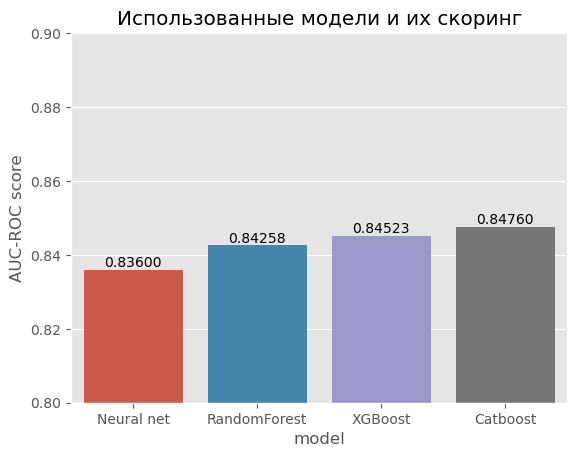

In [1215]:
ax = sns.barplot(data=final_scores, x='model', y='AUC-ROC score')
ax.set_ylim(0.8, 0.9)
# Добавляем значения столбцов на график
for p in ax.patches:
    ax.annotate(f'{p.get_height():.5f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Использованные модели и их скоринг')
plt.show()

## Получение тестовых предсказаний

Лучшей моделью по скоринге на валидации являтся Catboost с минимальным отрывом.  
Протестирую её качество.

In [1218]:
best_ctb = CatBoostClassifier(**study_cat.best_params, silent=True, random_seed=SEED)
best_ctb.fit(train_pool)
test_pool = Pool(X_test_sc, y_test, cat_features=list(categorical_features))
test_preds_probs = best_ctb.predict_proba(test_pool)[:, 1]

**Скоринг ROC-AUC на тестовой выборке**

In [1219]:
roc_auc_score(y_test, test_preds_probs)

0.8446182660953458

## Feature importances

In [1220]:
feature_imps = pd.DataFrame({'Feature': best_ctb.feature_names_,
                             'Importance': best_ctb.get_feature_importance()}).sort_values('Importance')
feature_imps.tail()

,Feature,Importance
3,MonthlyCharges,5.875444
2,PaymentMethod,6.433244
9,InternetService,14.113484
4,TotalCharges,14.910696
0,Type,42.223284


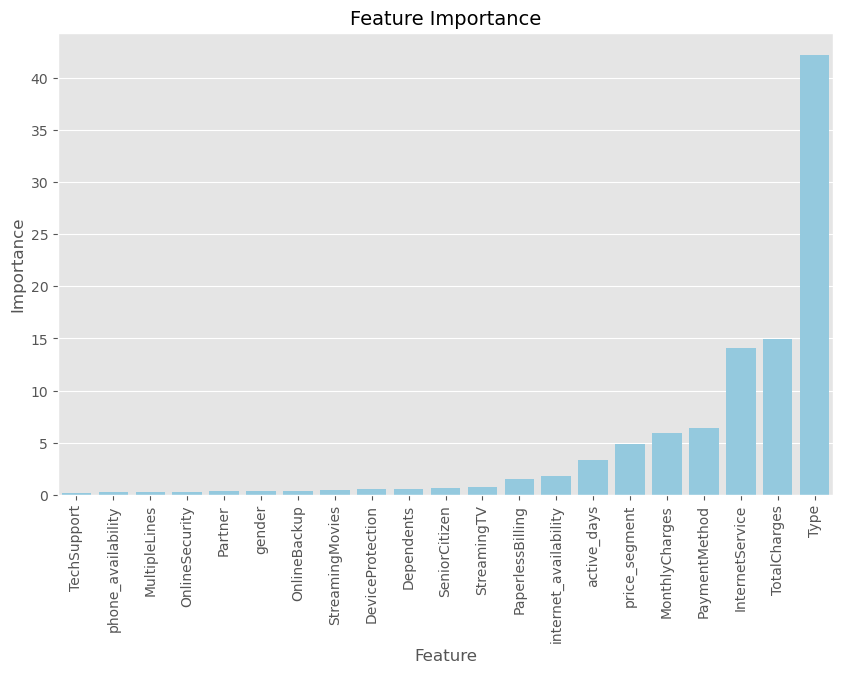

In [1221]:
# Построение barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feature_imps, color='skyblue')
# Горизонтальные подписи на оси x
plt.xticks(rotation=90)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importance', fontsize=14)
plt.show()

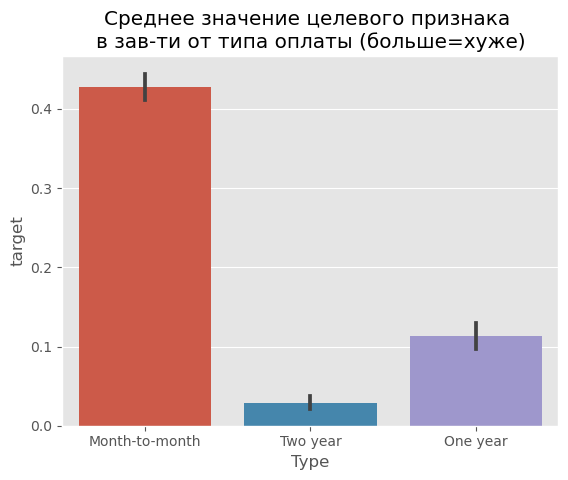

In [1222]:
sns.barplot(x='Type', y='target', data=df)
plt.title('Среднее значение целевого признака \nв зав-ти от типа оплаты (больше=хуже)')
plt.show()

**Вывод:**  
- Тип оплаты клиента очень сильно влияет на вероятность ухода клиента, клиенты с оплатой на год или два вперед уходят в несколько раз реже. **Рекомендация бизнесу**: стимулировать подписки на год-два путем маркетинга, скидок и пр.
- Также очевидно, что чаще уходят клиенты, которые платят больше остальных
- Клиенты с подключенным интернетом также в зоне риска. Нужно собирать по ним больше данных для обучения, а также проводить политику удержания (с помощью увеличенных скидок на годовую подписку, например)
- **Направления для улучшения модели**: визуализация feature importances показала, что, возможно, от некоторых признаков при обучении можно попробовать избавиться, если это поможет увеличить score, т.к. они имеют очень низкий показатель "важности" по мнению модели.

## Выбор порога вероятности класса, который обеспечит максимальное качество предсказаний.  
Для этого воспользуюсь графике **Precision-Recall Curve** и найду точку, Precision и recall в которой будут максимальными.  Для этого нужно посчитать f-score и найти точку на графике, где он максимальный.

Это позволит выбрать самый выгодный порог для определения, какие вероятности отнести к классу 1 (клиент ушел) или 0 - клиент не ушел.

**Рекомендация для бизнеса**: в зависимости от потребностей бизнеса порог вероятности можно менять для того, чтобы обеспечить большую полноту либо точность предсказаний, пожертвовав при этом одним или другим.

Best Threshold=0.326506, F-Score=0.629


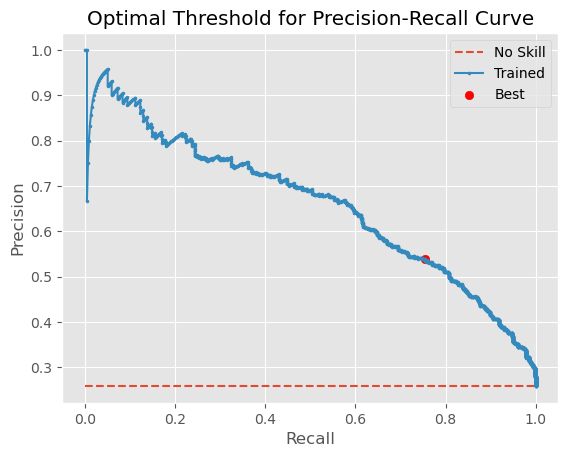

In [1118]:
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test, test_preds_probs)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', markersize=3, label='Trained')
plt.scatter(recall[ix], precision[ix], marker='o', color='red', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Optimal Threshold for Precision-Recall Curve')
# show the plot
plt.show()

Превращаем вероятности в метки классов.

In [1157]:
test_preds = (test_preds_probs>thresholds[ix]).round()

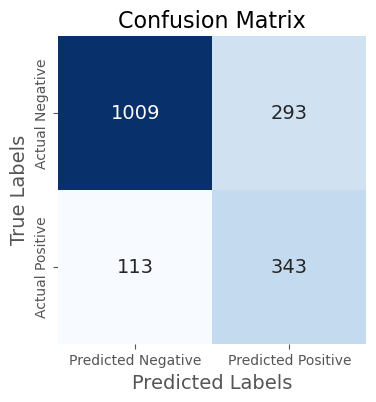

In [1158]:
# Визуализация матрицы ошибок с помощью heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, test_preds), annot=True, fmt='d',
            cmap='Blues', annot_kws={"size": 14}, cbar=False, square=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

**Вывод:**  
Чаще всего с выбранным порогом вероятности модель ошибается, предсказывая уход клиента там, где на самом деле ухода не было. Таким образом обеспечивается наилучший F1-score, т.е. баланс между Precision и Recall.

# Вывод по работе

Были проанализированы данные телеком-компании с целью предсказать уход клиента.
- Данные осмотрены на предмет качества, наличия выбросов
- Рассмотрены все признаки, их корреляции (хи-квадрат статистики), влияние на целевой признак
- Сформированы дополнительные признаки, полезные при обучении моделей
- Выполнено обучение следующих моделей:
    - RandomForest Classifier
    - Catboost Classifier
    - XGBoost
    - Neural net (torch)
- По скорингу на валидации выбран **Catboost Classifier**
- **Тестовый roc-auc составил 0.8446**
- Проанализированы основные признаки, влиявшие на обучение. Даны рекомендации бизнесу
- Выбран оптимальный порог вероятности для меток классов на основании Precision-Recall Curve, построена матрица ошибок. Данные проанализированы.